# AIRLINE PASSENGER SATISFACTION
___


# Kelompok 10

## BCC Data Science Intern 2024

- Diyang Raditya Anwar (225150407111037)
- Muhammad Omar Haqqi (235150219111001)

# [The Dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

# Data Understanding

Pada proses ini merupakan tahapan dalam proses data scientist yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan

### Import library yang dibutuhkan

In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from scipy.stats import randint
from matplotlib.cm import get_cmap

import warnings
warnings.filterwarnings("ignore")

### Import the data

In [207]:
df = pd.read_csv('D:/Drive D/coleyah at ubeh/kepanitiaan dan organisasi/BCC/BCC 2024/Intern/Calon dataset/Airline passenger satisfaction/train.csv')
df.iloc[:, 0:20].head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4


In [92]:
df.iloc[:, 20:25].head(10)

,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,5,5,25,18.0,neutral or dissatisfied
1,4,1,1,6.0,neutral or dissatisfied
2,4,5,0,0.0,satisfied
3,4,2,11,9.0,neutral or dissatisfied
4,3,3,0,0.0,satisfied
5,4,1,0,0.0,neutral or dissatisfied
6,5,2,9,23.0,neutral or dissatisfied
7,5,4,4,0.0,satisfied
8,1,2,0,0.0,neutral or dissatisfied
9,3,2,0,0.0,neutral or dissatisfied


### Statistik deskriptif

Menampilkan statistik deskriptif dari dataset. Berfungsi untuk mendapatkan rangkuman central tendency dan sebaran dari dataset

In [93]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [94]:
df.shape

(103904, 25)

Dataset ini terdapat 103904 baris dan 25 kolom

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [96]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [97]:
df.duplicated().sum()

0

Walaa.. sepertinya ada data yang kosong nii, markiber (mari kita bersihkan)

# Data Cleaning

Tahapan yang dimana merupakan proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar

## Drop data yang tidak dibutuhkan

In [98]:
df1 = df.drop(['Unnamed: 0', 'id'], axis=1)
df1.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [99]:
df1.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [100]:
df1["Arrival Delay in Minutes"].mean()

15.178678301832152

In [101]:
df1["Arrival Delay in Minutes"] = df1["Arrival Delay in Minutes"].fillna(df1["Arrival Delay in Minutes"].mean())
## Mengisi value yang kosong

In [102]:
df1["Arrival Delay in Minutes"].mean()

15.1786783018322

In [103]:
df1.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

yeay!! Data sudah bersih, markilor (mari kita eksplor)

# EDA (Exploratory Data Analysis)

Pada proses ini akan melakukan investigasi pada dataset yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi. Mari kita gali informasi yang terdapat dari dataset berikut

## Univariate Analysis


### Categorical Columns

In [106]:
var_cat = df1.select_dtypes(include=["object"]).columns
print(var_cat)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


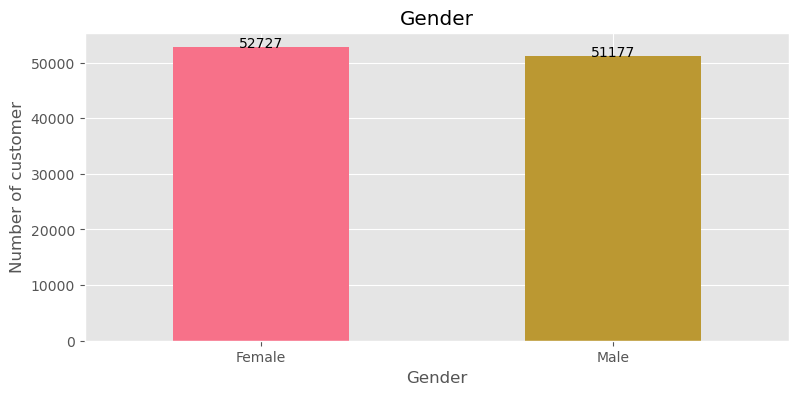

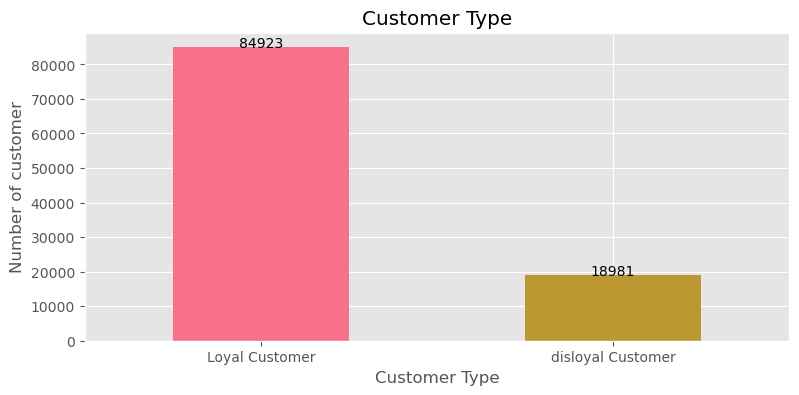

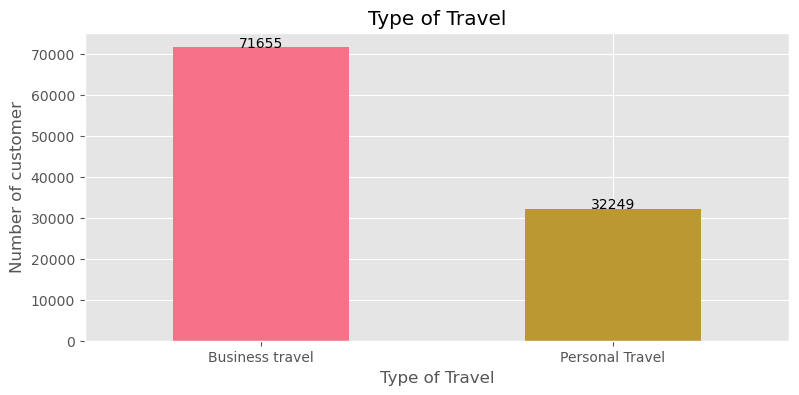

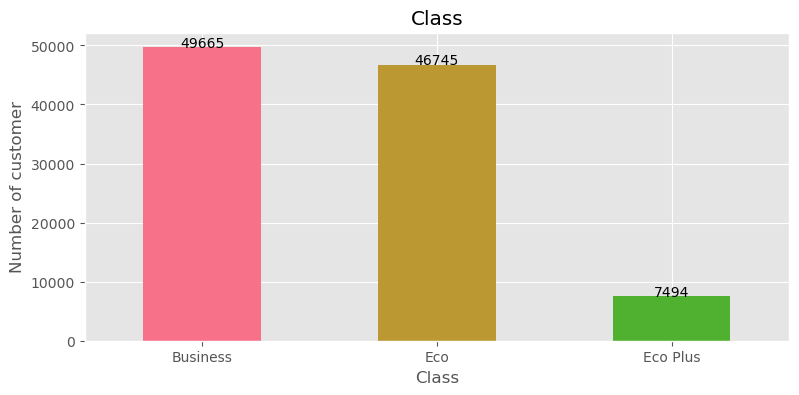

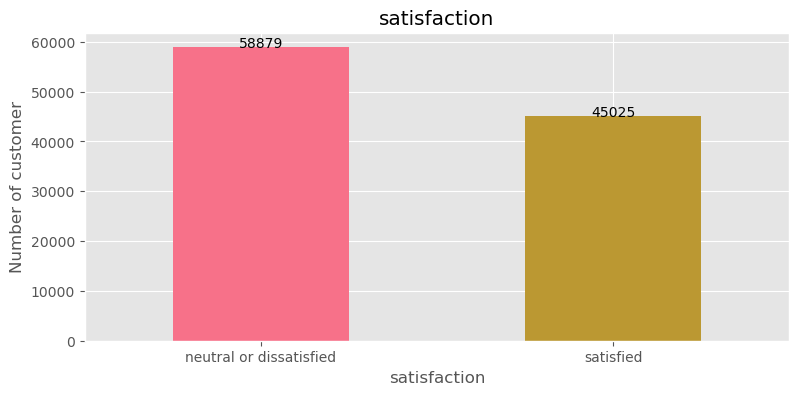

In [107]:
plt.style.use("ggplot")
warna_warna = sns.color_palette("husl")

for col_name in var_cat:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    col = df1[col_name].value_counts()
    col.plot(kind="bar", color=warna_warna)
    plt.xlabel(col_name)
    plt.ylabel("Number of customer")
    plt.xticks(rotation=0)
    plt.title(col_name)
    for i, val in enumerate(col):
        plt.text(i, val + 0.1, str(val), ha='center')

([<matplotlib.patches.Wedge at 0x1681f650e20>,
 [Text(-0.025773424500537056, 1.0996980179074232, 'Female'),
  Text(0.02577342450053692, -1.0996980179074232, 'Male')],
 [Text(-0.014058231545747483, 0.5998352824949581, '50.75%'),
  Text(0.01405823154574741, -0.5998352824949581, '49.25%')])

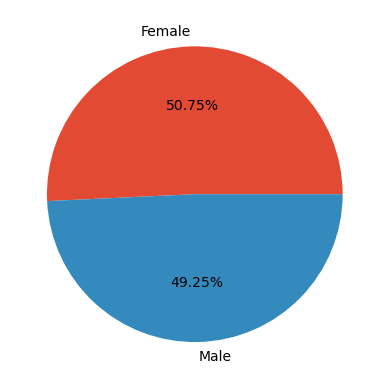

In [108]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
Gen_pie = df1["Gender"].value_counts()
Gen_pie_a = Gen_pie.index
ax.pie(Gen_pie, labels=Gen_pie_a, autopct='%2.2f%%')

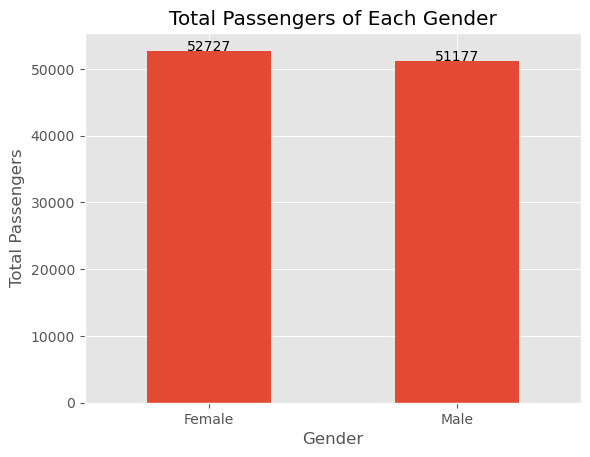

In [109]:
gender_counts = df1["Gender"].value_counts()
ax = gender_counts.plot(kind="bar")
for i, val in enumerate(gender_counts):
    plt.text(i, val + 0.1, str(val), ha='center')

plt.xlabel('Gender')
plt.ylabel('Total Passengers')
plt.title('Total Passengers of Each Gender')
plt.xticks(rotation=0)
plt.show()

## Numerical columns


In [110]:
var_sati = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service'
          , 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

Text(0.5, 1.0, 'Age Passenger Distribution')

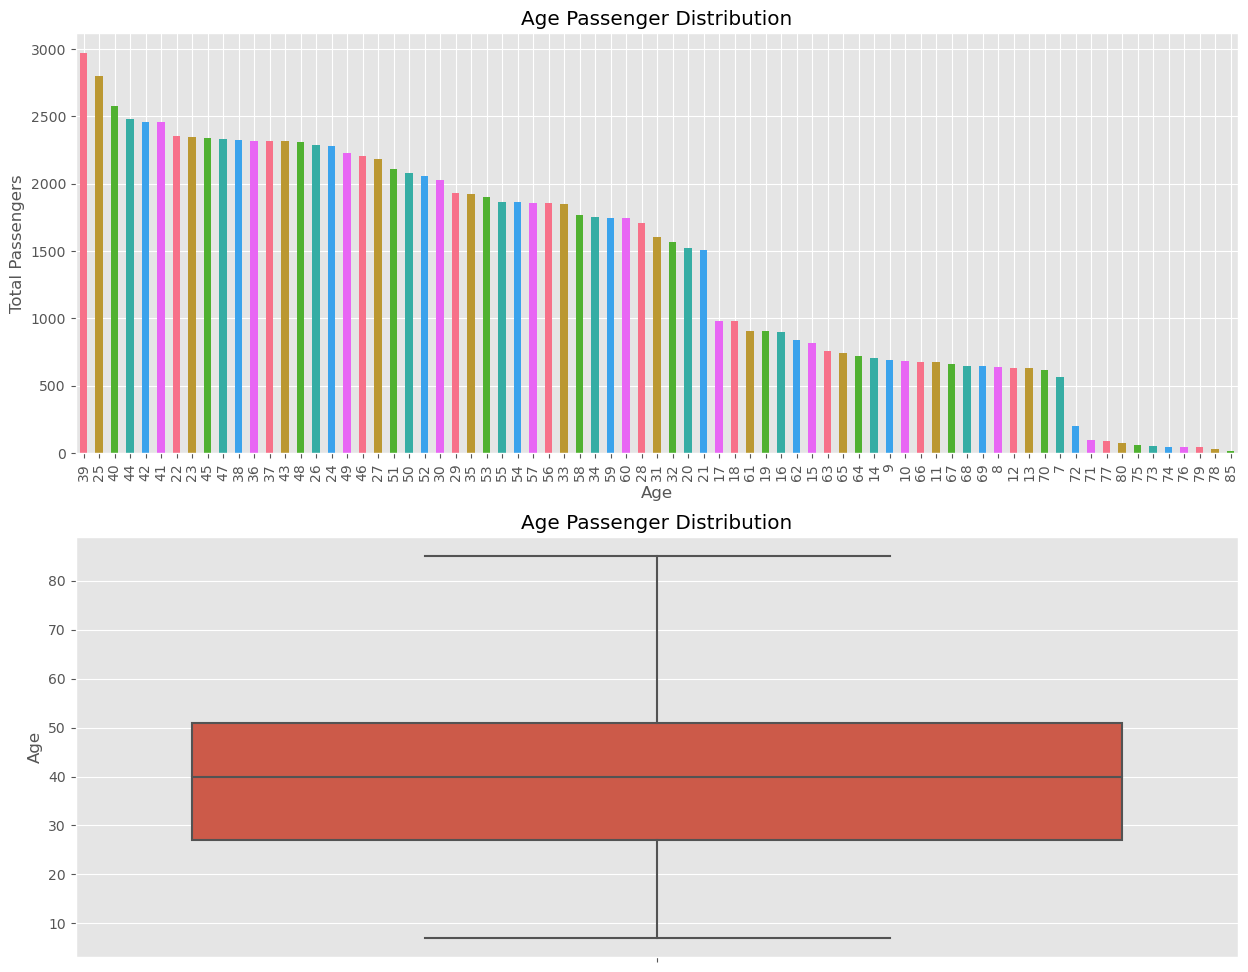

In [111]:
plt.style.use("ggplot")
warnaa = sns.color_palette("husl")

plt.figure(figsize=(15,12))

plt.subplot(2, 1, 1)
df1["Age"].value_counts().plot(kind="bar", color=warnaa)
plt.xlabel("Age")
plt.ylabel("Total Passengers")
plt.title("Age Passenger Distribution")

plt.subplot(2, 1, 2)
sns.boxplot(y=df1["Age"])
plt.title("Age Passenger Distribution")


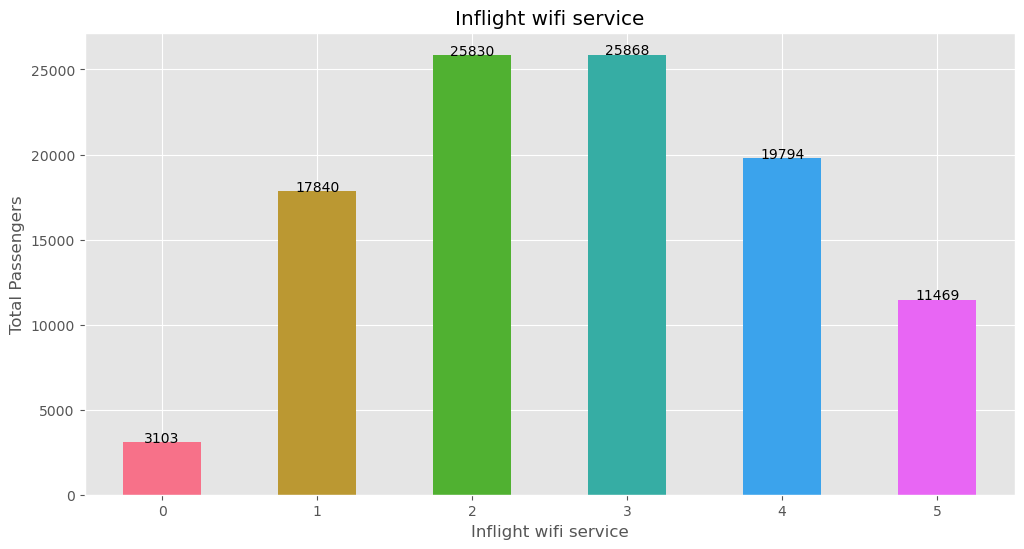

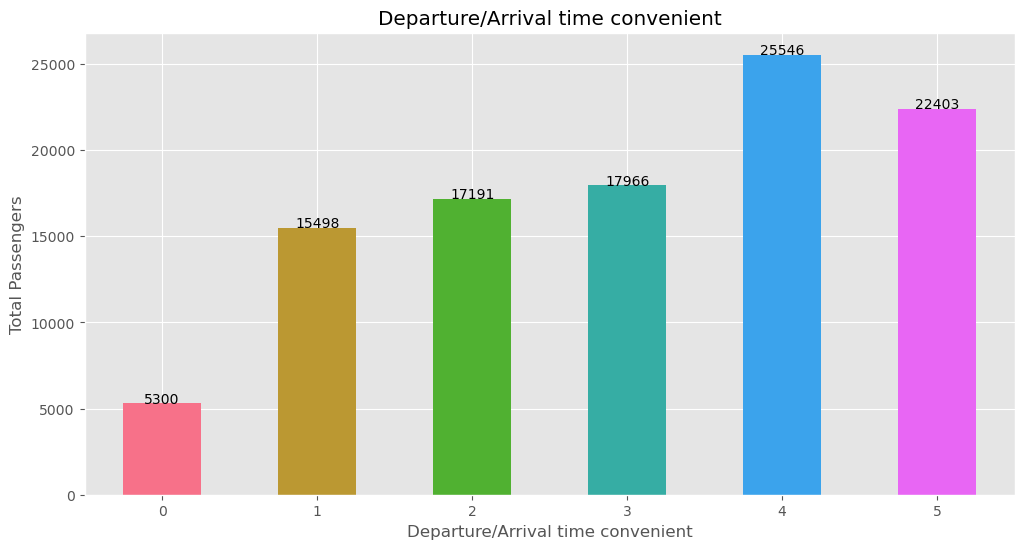

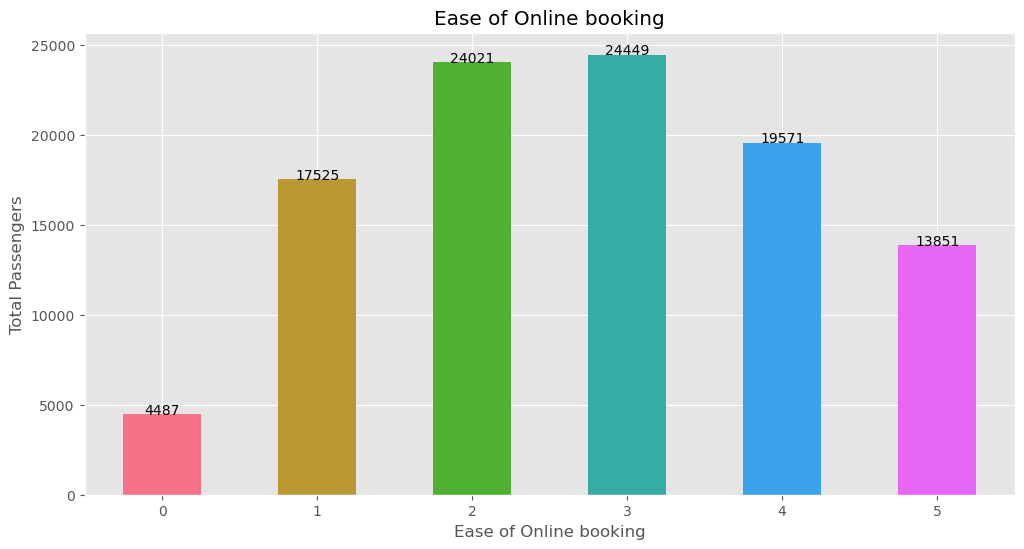

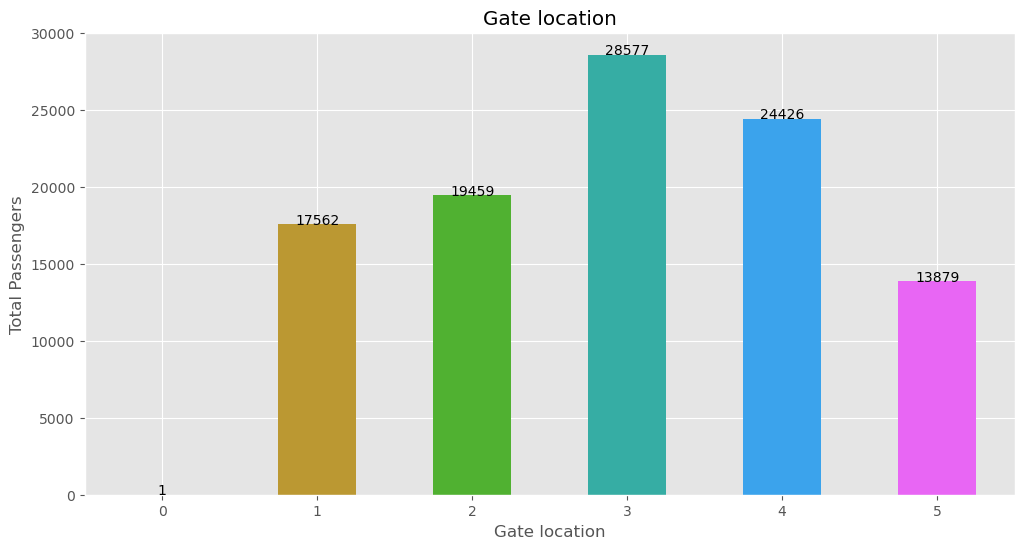

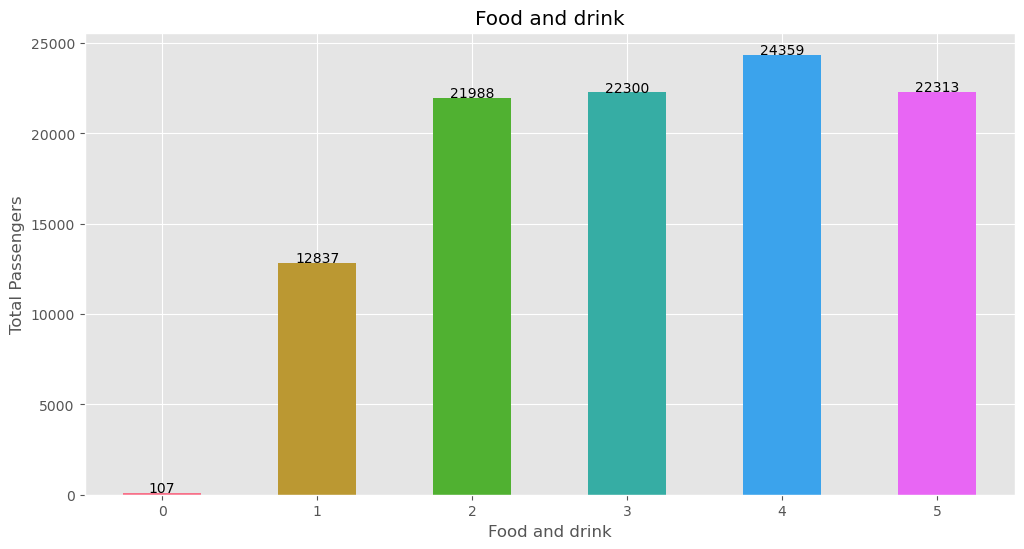

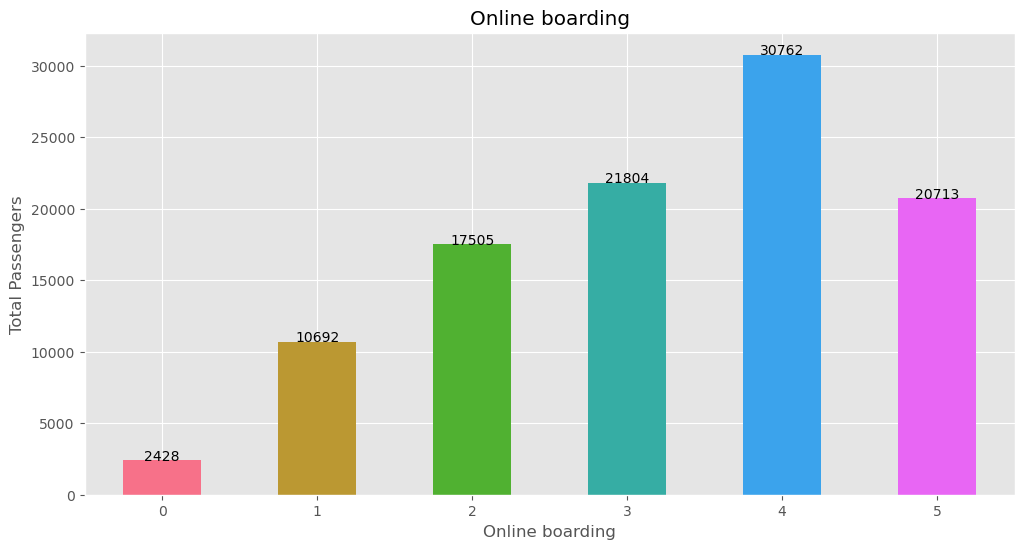

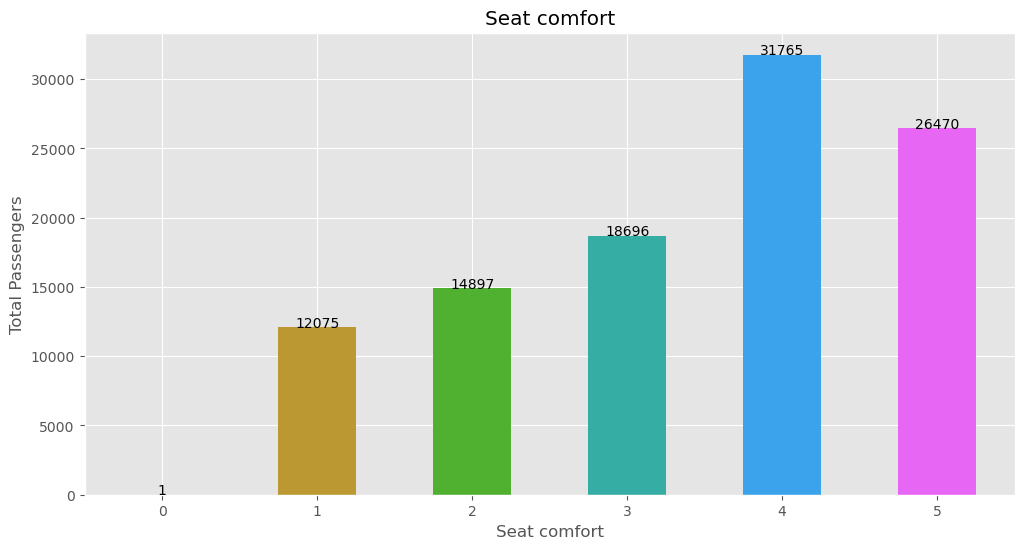

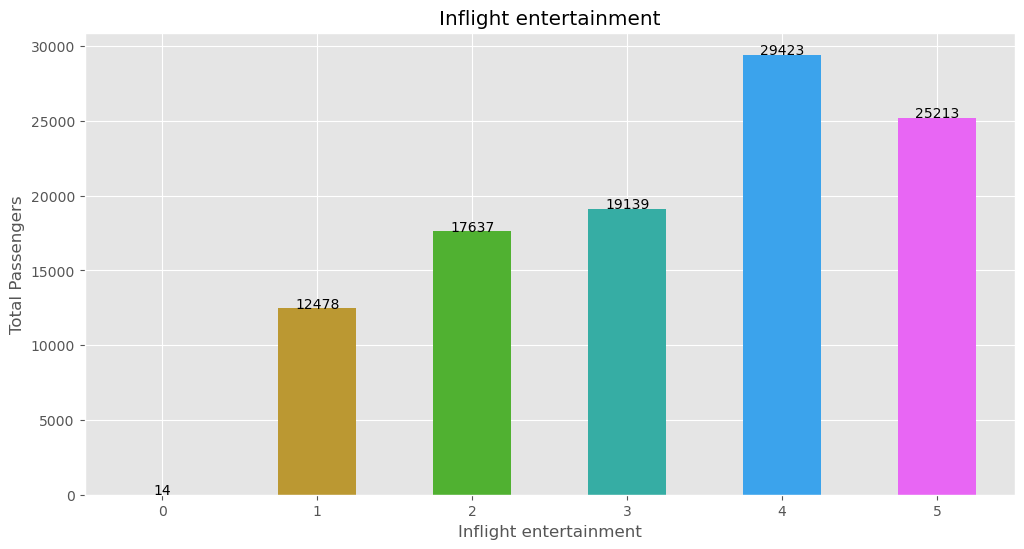

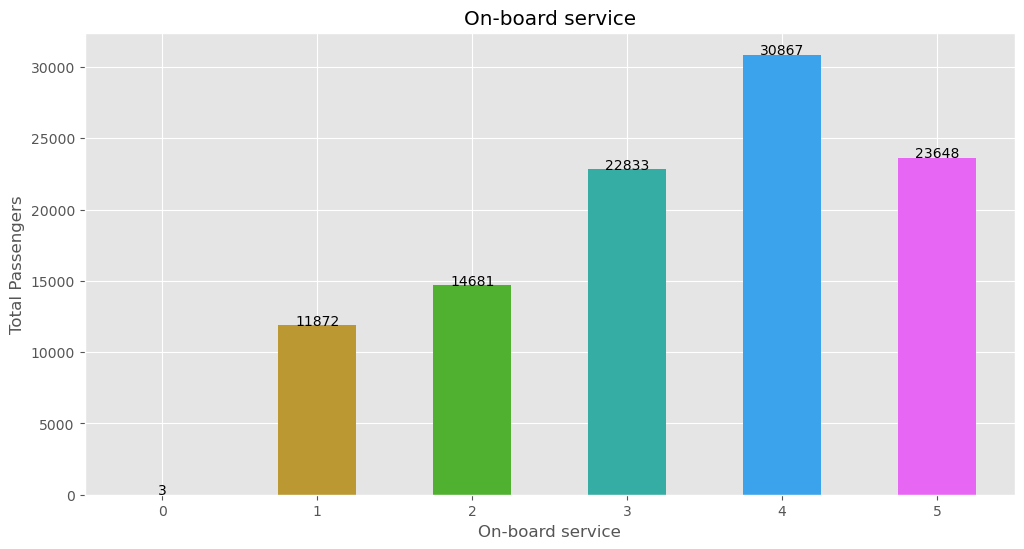

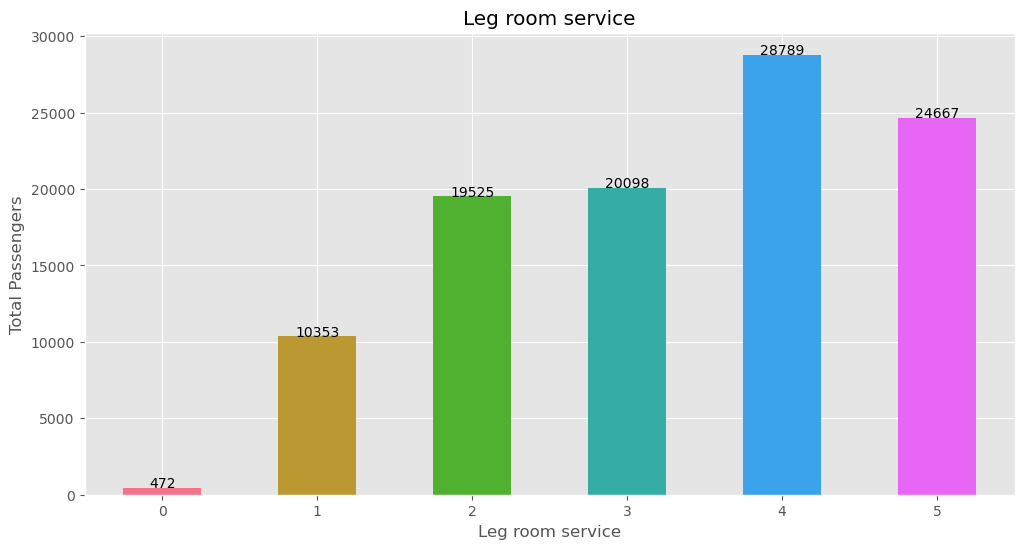

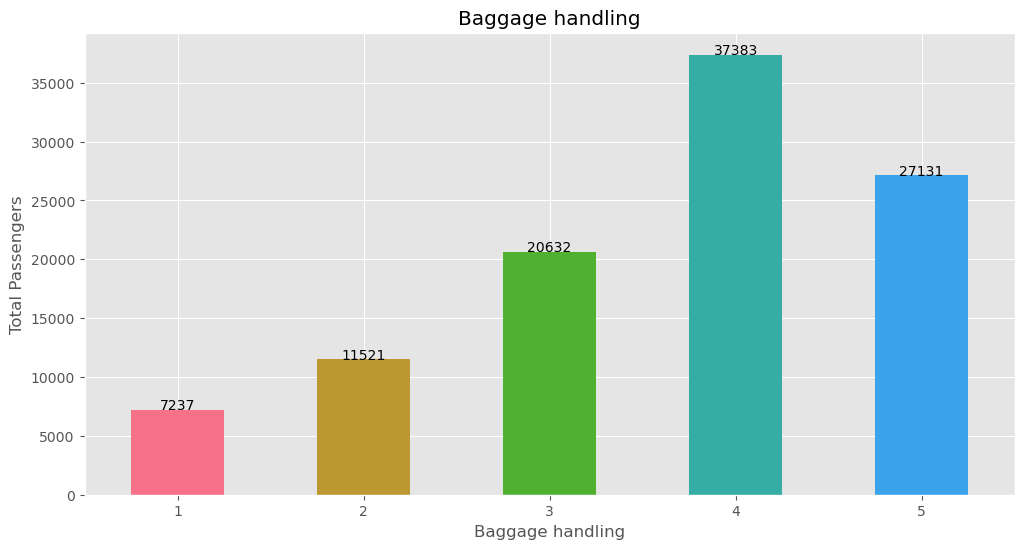

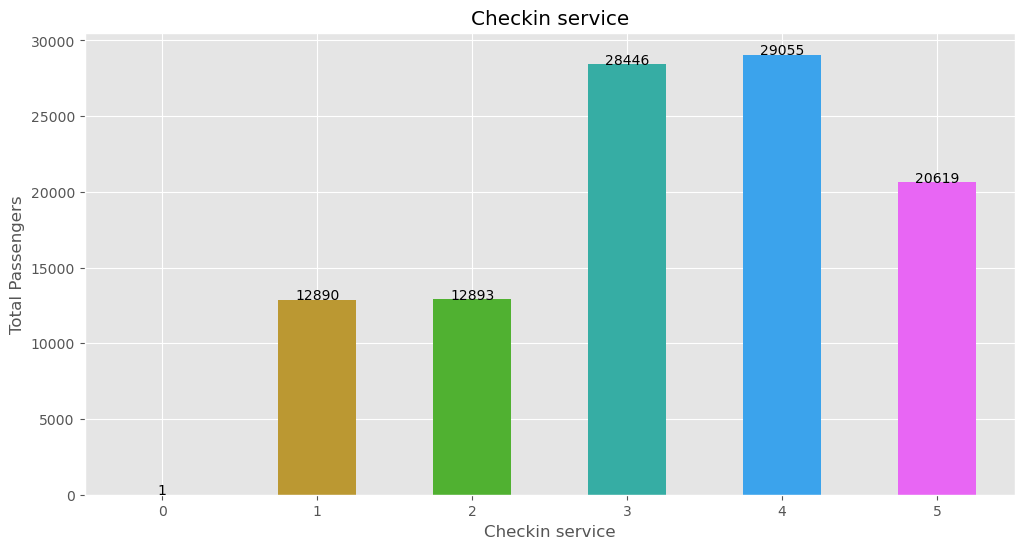

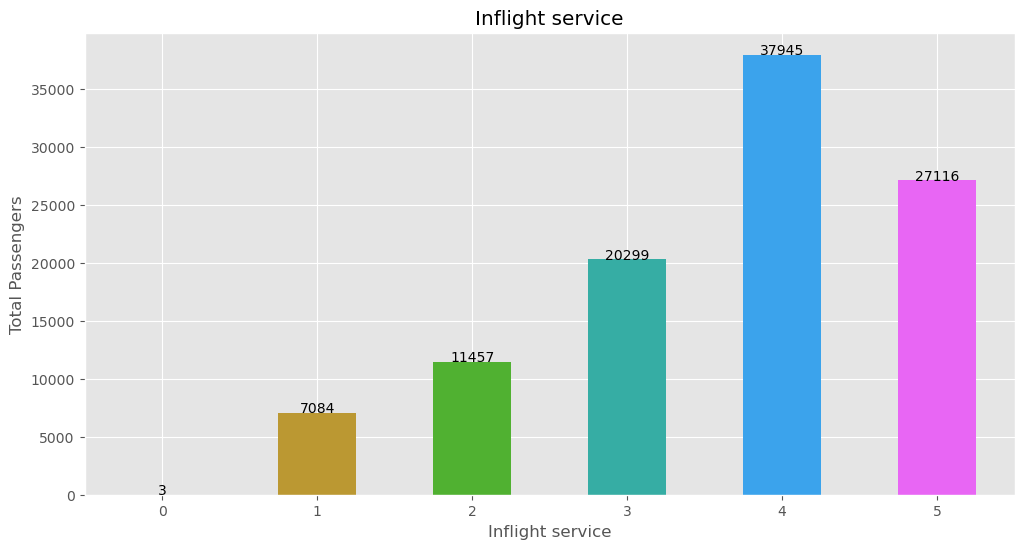

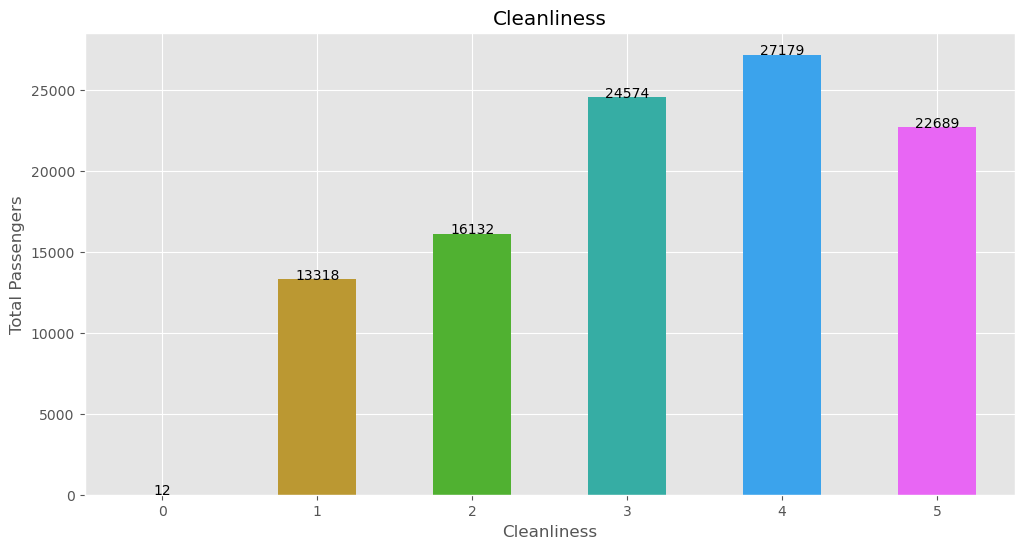

In [112]:
plt.style.use("ggplot")
wirni_warna = sns.color_palette("husl")

for kolom in var_sati:
    plt.figure(figsize=(12,6))
    counts = df1[kolom].value_counts().sort_index()
    counts.plot(kind="bar", color=wirni_warna)
    plt.xlabel(kolom)
    plt.ylabel("Total Passengers")
    plt.xticks(rotation=0)
    plt.title(kolom)
    for i, val in enumerate(counts):
        plt.text(i, val + 0.1, str(val), ha='center')

Text(0.5, 1.0, 'Arrival Delay in Minutes')

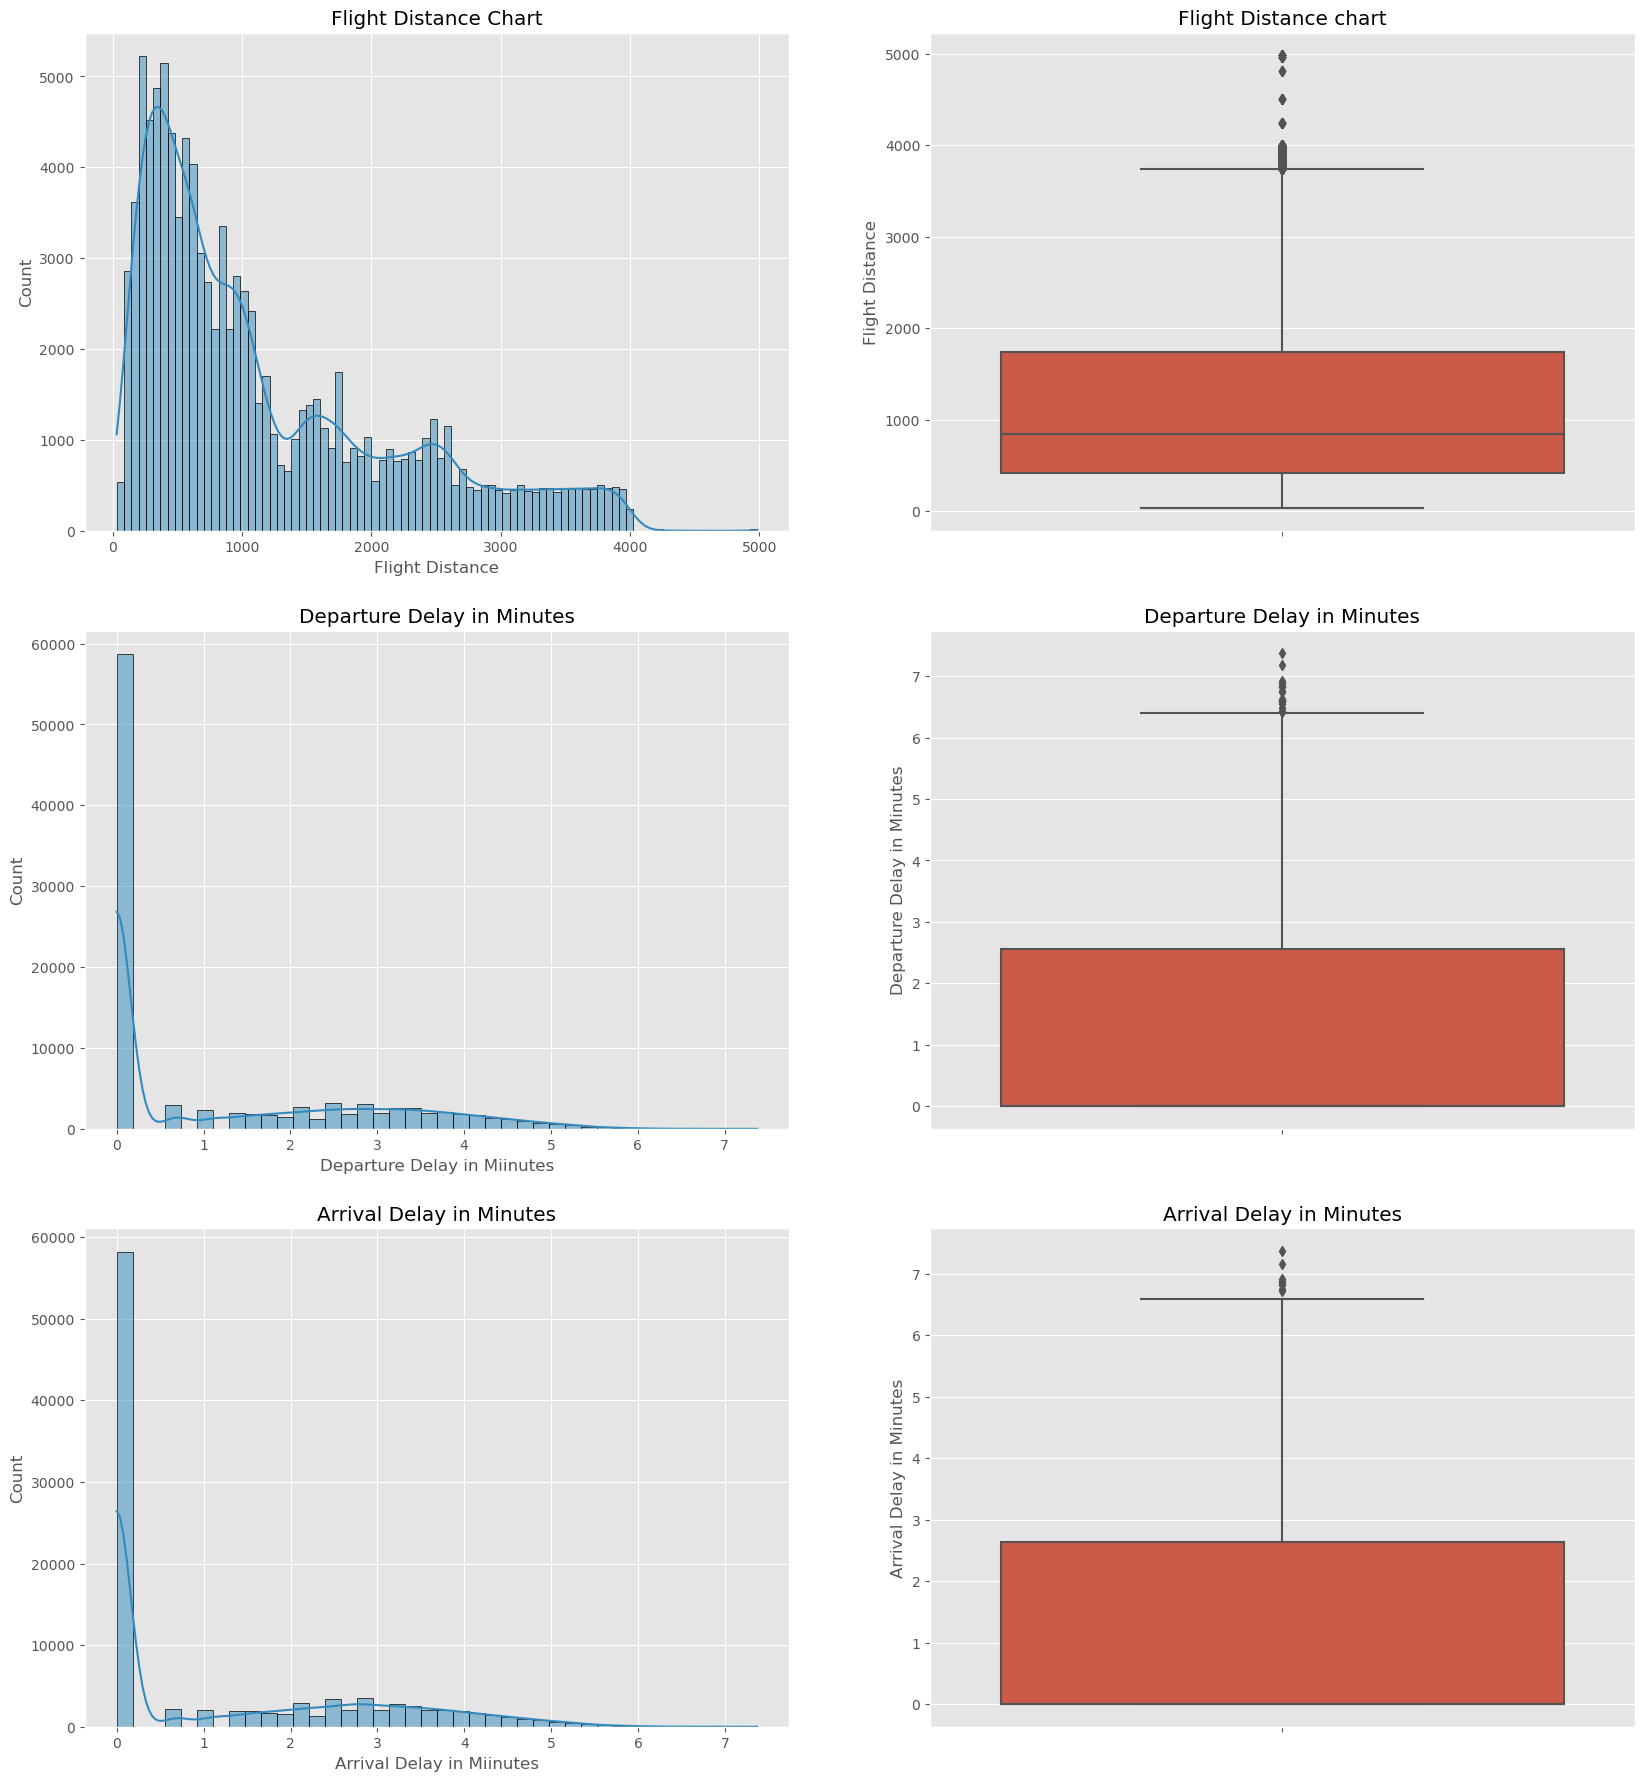

In [113]:
plt.figure(figsize=(20,22))

plt.subplot(3, 2, 1)
sns.histplot(df1["Flight Distance"], edgecolor='black', kde=True)
plt.xlabel("Flight Distance")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Flight Distance Chart")

plt.subplot(3, 2, 2)
sns.boxplot(y=df1["Flight Distance"])
plt.title("Flight Distance chart")

plt.subplot(3, 2, 3)
sns.histplot(np.log(df1["Departure Delay in Minutes"] + 1), bins=40, edgecolor='black', kde=True)
plt.xlabel("Departure Delay in Miinutes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Departure Delay in Minutes")

plt.subplot(3, 2, 4)
sns.boxplot(y=np.log(df1["Departure Delay in Minutes"] + 1))
plt.title("Departure Delay in Minutes")

plt.subplot(3, 2, 5)
sns.histplot(np.log(df1["Arrival Delay in Minutes"] + 1), bins=40, edgecolor='black', kde=True)
plt.xlabel("Arrival Delay in Miinutes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Arrival Delay in Minutes")

plt.subplot(3, 2, 6)
sns.boxplot(y=np.log(df1["Arrival Delay in Minutes"] + 1))
plt.title("Arrival Delay in Minutes")


<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

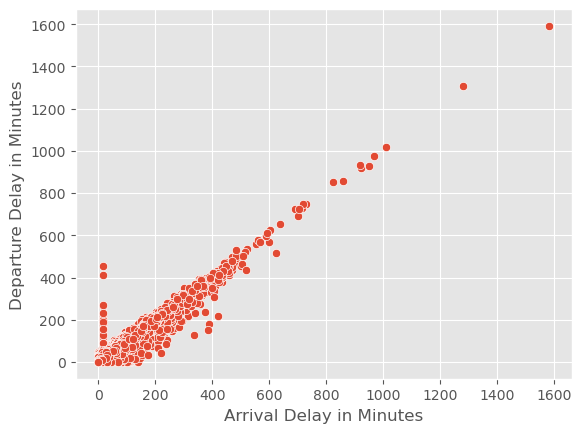

In [114]:
sns.scatterplot(x=df1["Arrival Delay in Minutes"], y=df1["Departure Delay in Minutes"], data=df1)

<AxesSubplot:>

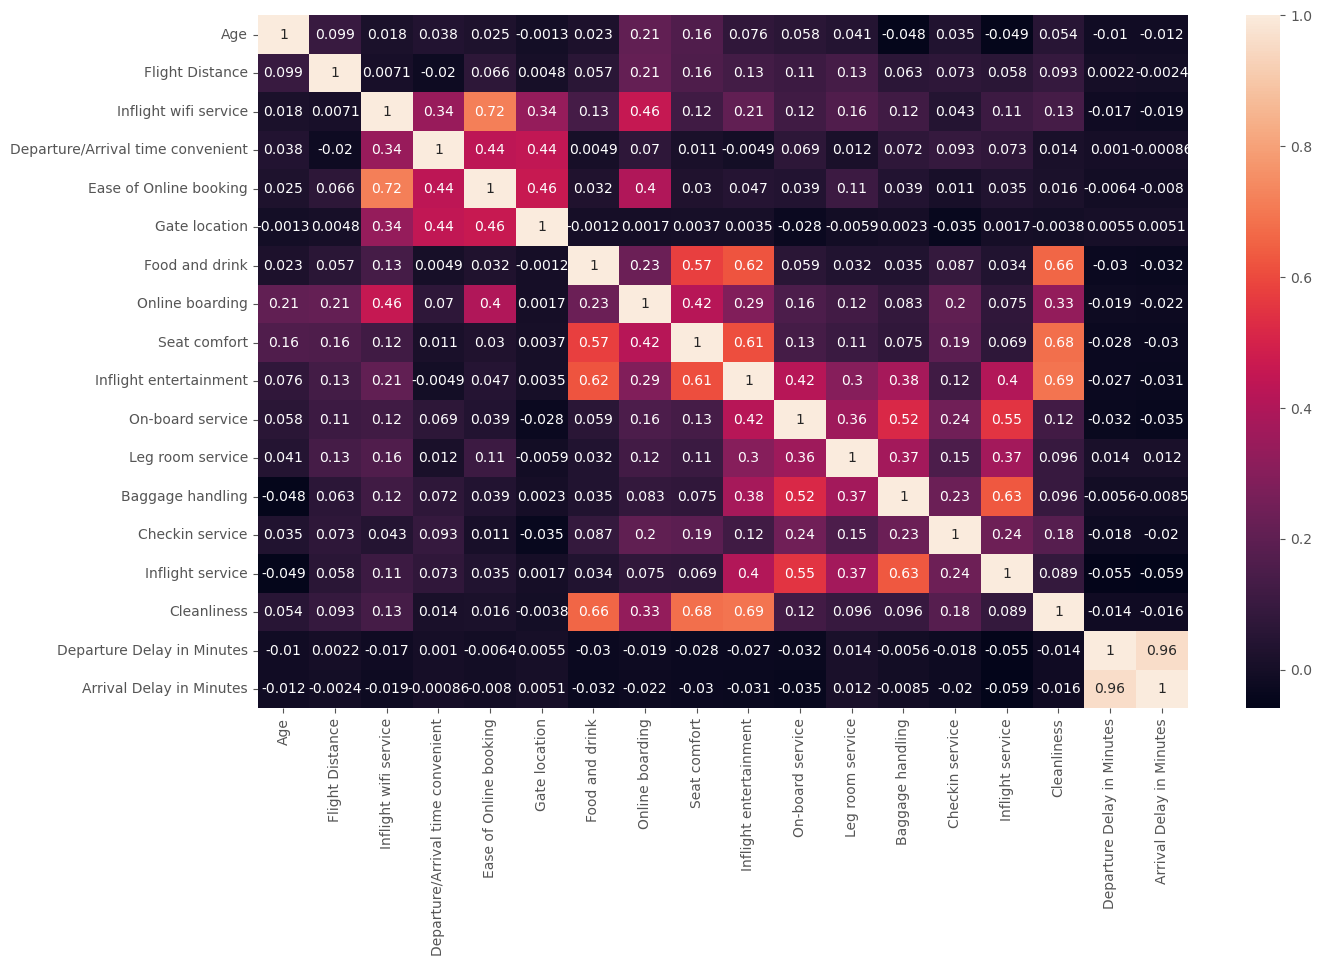

In [115]:
plt.figure(figsize=(15,9))
df_cor = df1.corr()
sns.heatmap(df_cor, annot=True)

## Bivariate Analysis

In [116]:
batas = [0, 12, 20, 60, float('inf')]
kateg = ['Child', 'Teenager', 'Adult', 'Old']
df1['Age Category'] = pd.cut(df1['Age'], bins=batas, labels=kateg, right=False)
kol_catage = df1.pop('Age Category')
df1.insert(loc=4, column='Age Category', value=kol_catage)
df1.head(10)

,Gender,Customer Type,Age,Type of Travel,Age Category,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Teenager,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Adult,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Adult,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Adult,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Old,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Adult,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Adult,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Adult,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Adult,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Adult,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


Text(0.5, 1.0, 'Satisfaction Chart by Age Category')

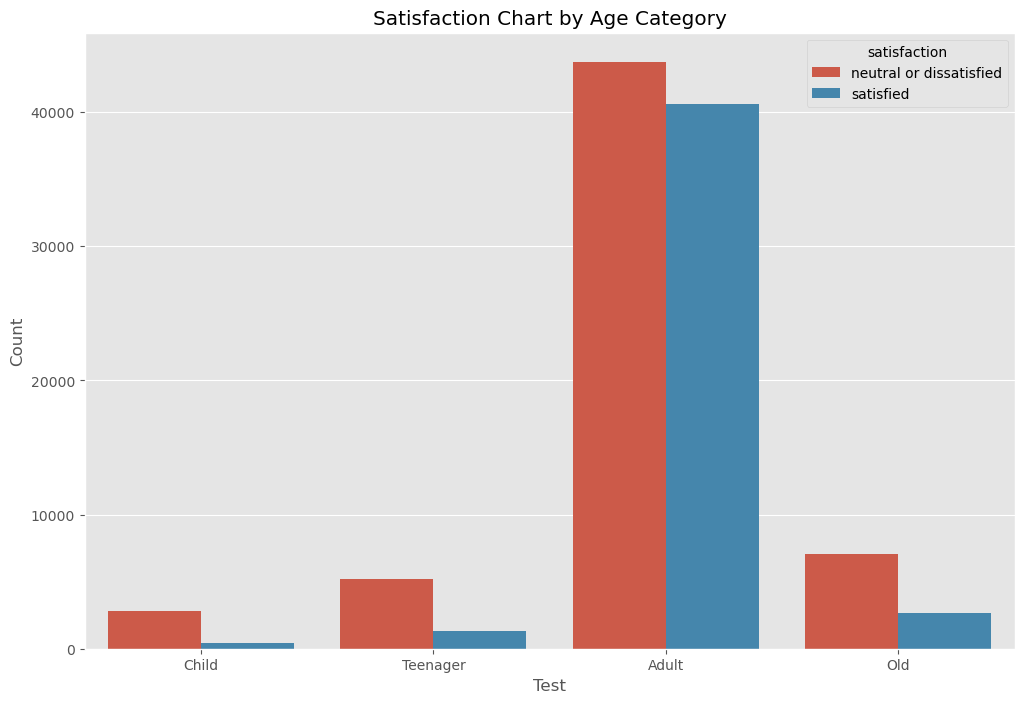

In [117]:
plt.style.use("ggplot")
wir = sns.color_palette("husl")

plt.figure(figsize=(12,8))
sns.countplot(data=df1, x= df1["Age Category"], hue=df1["satisfaction"])
plt.xlabel("Test")
plt.ylabel("Count")
plt.title("Satisfaction Chart by Age Category")

In [118]:
economy = df1.loc[df1['Class'] == 'Eco']
economy_Plus = df1.loc[df1['Class'] == 'Eco Plus']
business = df1.loc[df1['Class'] == 'Business']

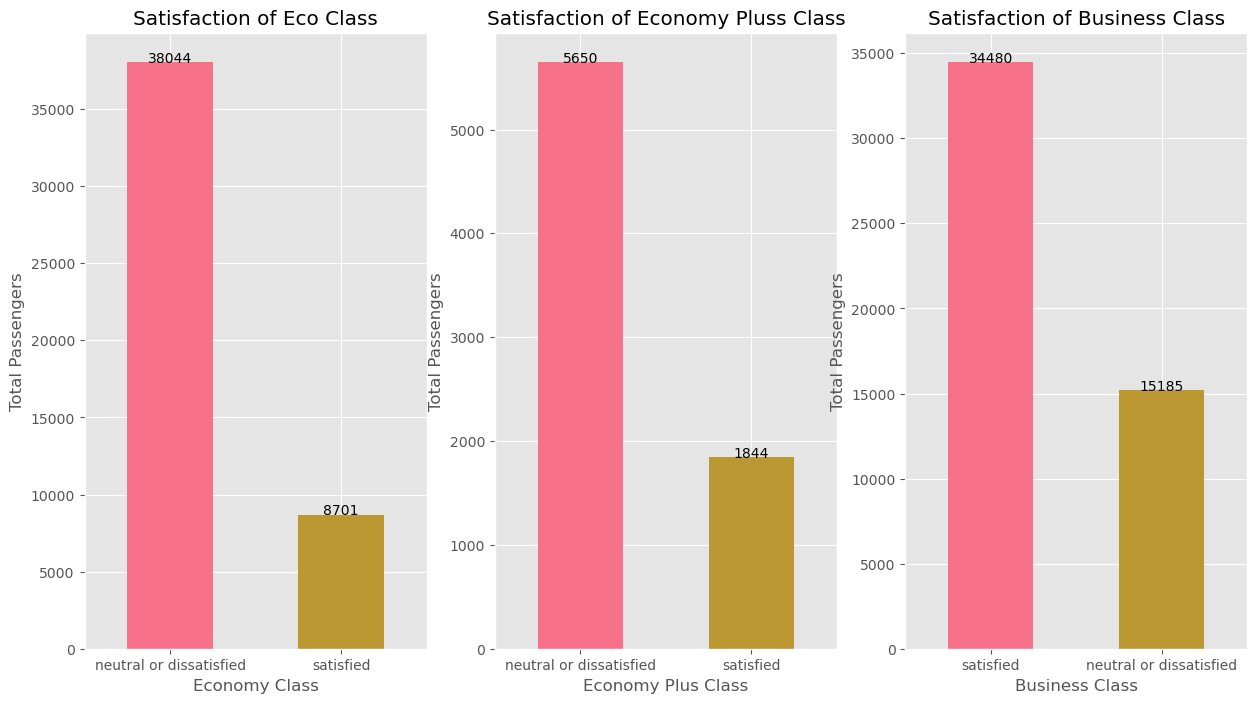

In [119]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
warnacuy = sns.color_palette('husl')

plt.subplot(1, 3, 1)
economy['satisfaction'].value_counts().plot(kind='bar', color=warnacuy)
plt.title('Satisfaction of Eco Class')
plt.xticks(rotation=0)
plt.ylabel("Total Passengers")
plt.xlabel("Economy Class")
for i, val in enumerate(economy['satisfaction'].value_counts()):
    plt.text(i, val + 0.1, int(val), ha='center')


plt.subplot(1, 3, 2)
economy_Plus['satisfaction'].value_counts().plot(kind='bar', color=warnacuy)
plt.title('Satisfaction of Economy Pluss Class')
plt.xticks(rotation=0)
plt.ylabel("Total Passengers")
plt.xlabel("Economy Plus Class")
for i, val in enumerate(economy_Plus['satisfaction'].value_counts()):
    plt.text(i, val + 0.1, int(val), ha='center')

plt.subplot(1, 3, 3)
business['satisfaction'].value_counts().plot(kind='bar', color=warnacuy)
plt.title('Satisfaction of Business Class')
plt.ylabel("Total Passengers")
plt.xlabel("Business Class")
plt.xticks(rotation=0)
for i, val in enumerate(business['satisfaction'].value_counts()):
    plt.text(i, val + 0.1, int(val), ha='center')

# Reporting the problem and solutions

## Bagaimana fasilitas dan layanan maskapai ini??

Untuk mengetahui bagiamana kepuasan penumpang terhadap suatu fasilitas atau layanan yang ada pada penerbangan ini, kita bisa membuat dataframe baru yang hanya berisi fitur-fitur terkait kepuasan fasilitas atau layanan.

In [28]:
df_score = df.iloc[:, 8:22]
df_score['Satisfaction'] = df1['satisfaction']
df_score

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,neutral or dissatisfied
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,satisfied
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,neutral or dissatisfied
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,neutral or dissatisfied


##### Melihat perbandingan kepuasan fasilitas-fasilitas dan layanan-layanan penerbangan

Dari diagram-diagram di atas, kita bisa melihat sekilas perbandingan antara nilai-nilai kepuasan dari setiap fasilitas atau layanan dari rentang 0-5. Kita bisa melihat hampir semua fasiltas dan layanan yang disediakan memiliki nilai kepuasan terbanyak  4 dan 5. Namun, agar bisa lebih mudah melihat fasilitas mana yang sudah memuaskan dan dan yang masih kurang memuaskan kita bisa mengkategorikannya menjadi 2 kategori saja. Yaitu sattis untuk nilai 4-5 dan dissatis untuk nilai 0-3

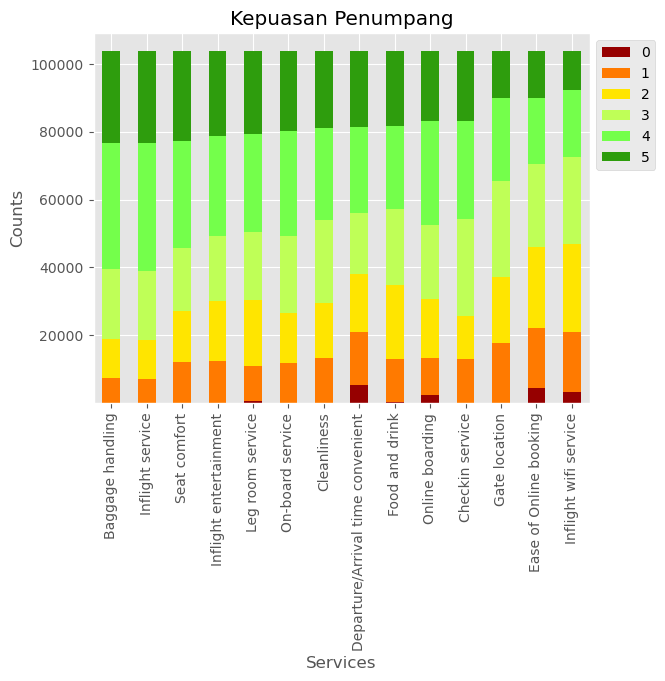

In [43]:
dt_trans = df_score.drop('Satisfaction', axis=1).apply(lambda x: x.value_counts()).T.sort_values(5, ascending=False)
dt_trans.plot(kind='bar', stacked=True, color=['#960000', '#FF7A00', '#FFE500', '#BFFF57','#74FF4B', '#2E9D0D'])
plt.title('Kepuasan Penumpang')
plt.ylabel('Counts')
plt.xlabel('Services')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

##### Mengkategorikan nilai-nilai kepuasan

In [36]:
kol3 = ['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']
batas = [0, 4, float('inf')]
kateg = ['Neutral or Dissatisfied', 'Satisfied']
df_2 = df_score.iloc[:, -2:0]

for k in kol3:
    df_2[f'{k}_'] = pd.cut(df1[k], bins=batas, labels=kateg, right=False)

df_2.to_csv('satis_or_disatis2.csv', index=True)

In [37]:
df_2.head(10)

,Inflight wifi service_,Departure/Arrival time convenient_,Ease of Online booking_,Gate location_,Food and drink_,Online boarding_,Seat comfort_,Inflight entertainment_,On-board service_,Leg room service_,Baggage handling_,Checkin service_,Inflight service_,Cleanliness_
0,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied
1,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied
2,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied
3,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied
4,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied
5,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Neutral or Dissatisfied
6,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied
7,Satisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied
8,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied
9,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Neutral or Dissatisfied,Satisfied,Satisfied,Neutral or Dissatisfied,Neutral or Dissatisfied


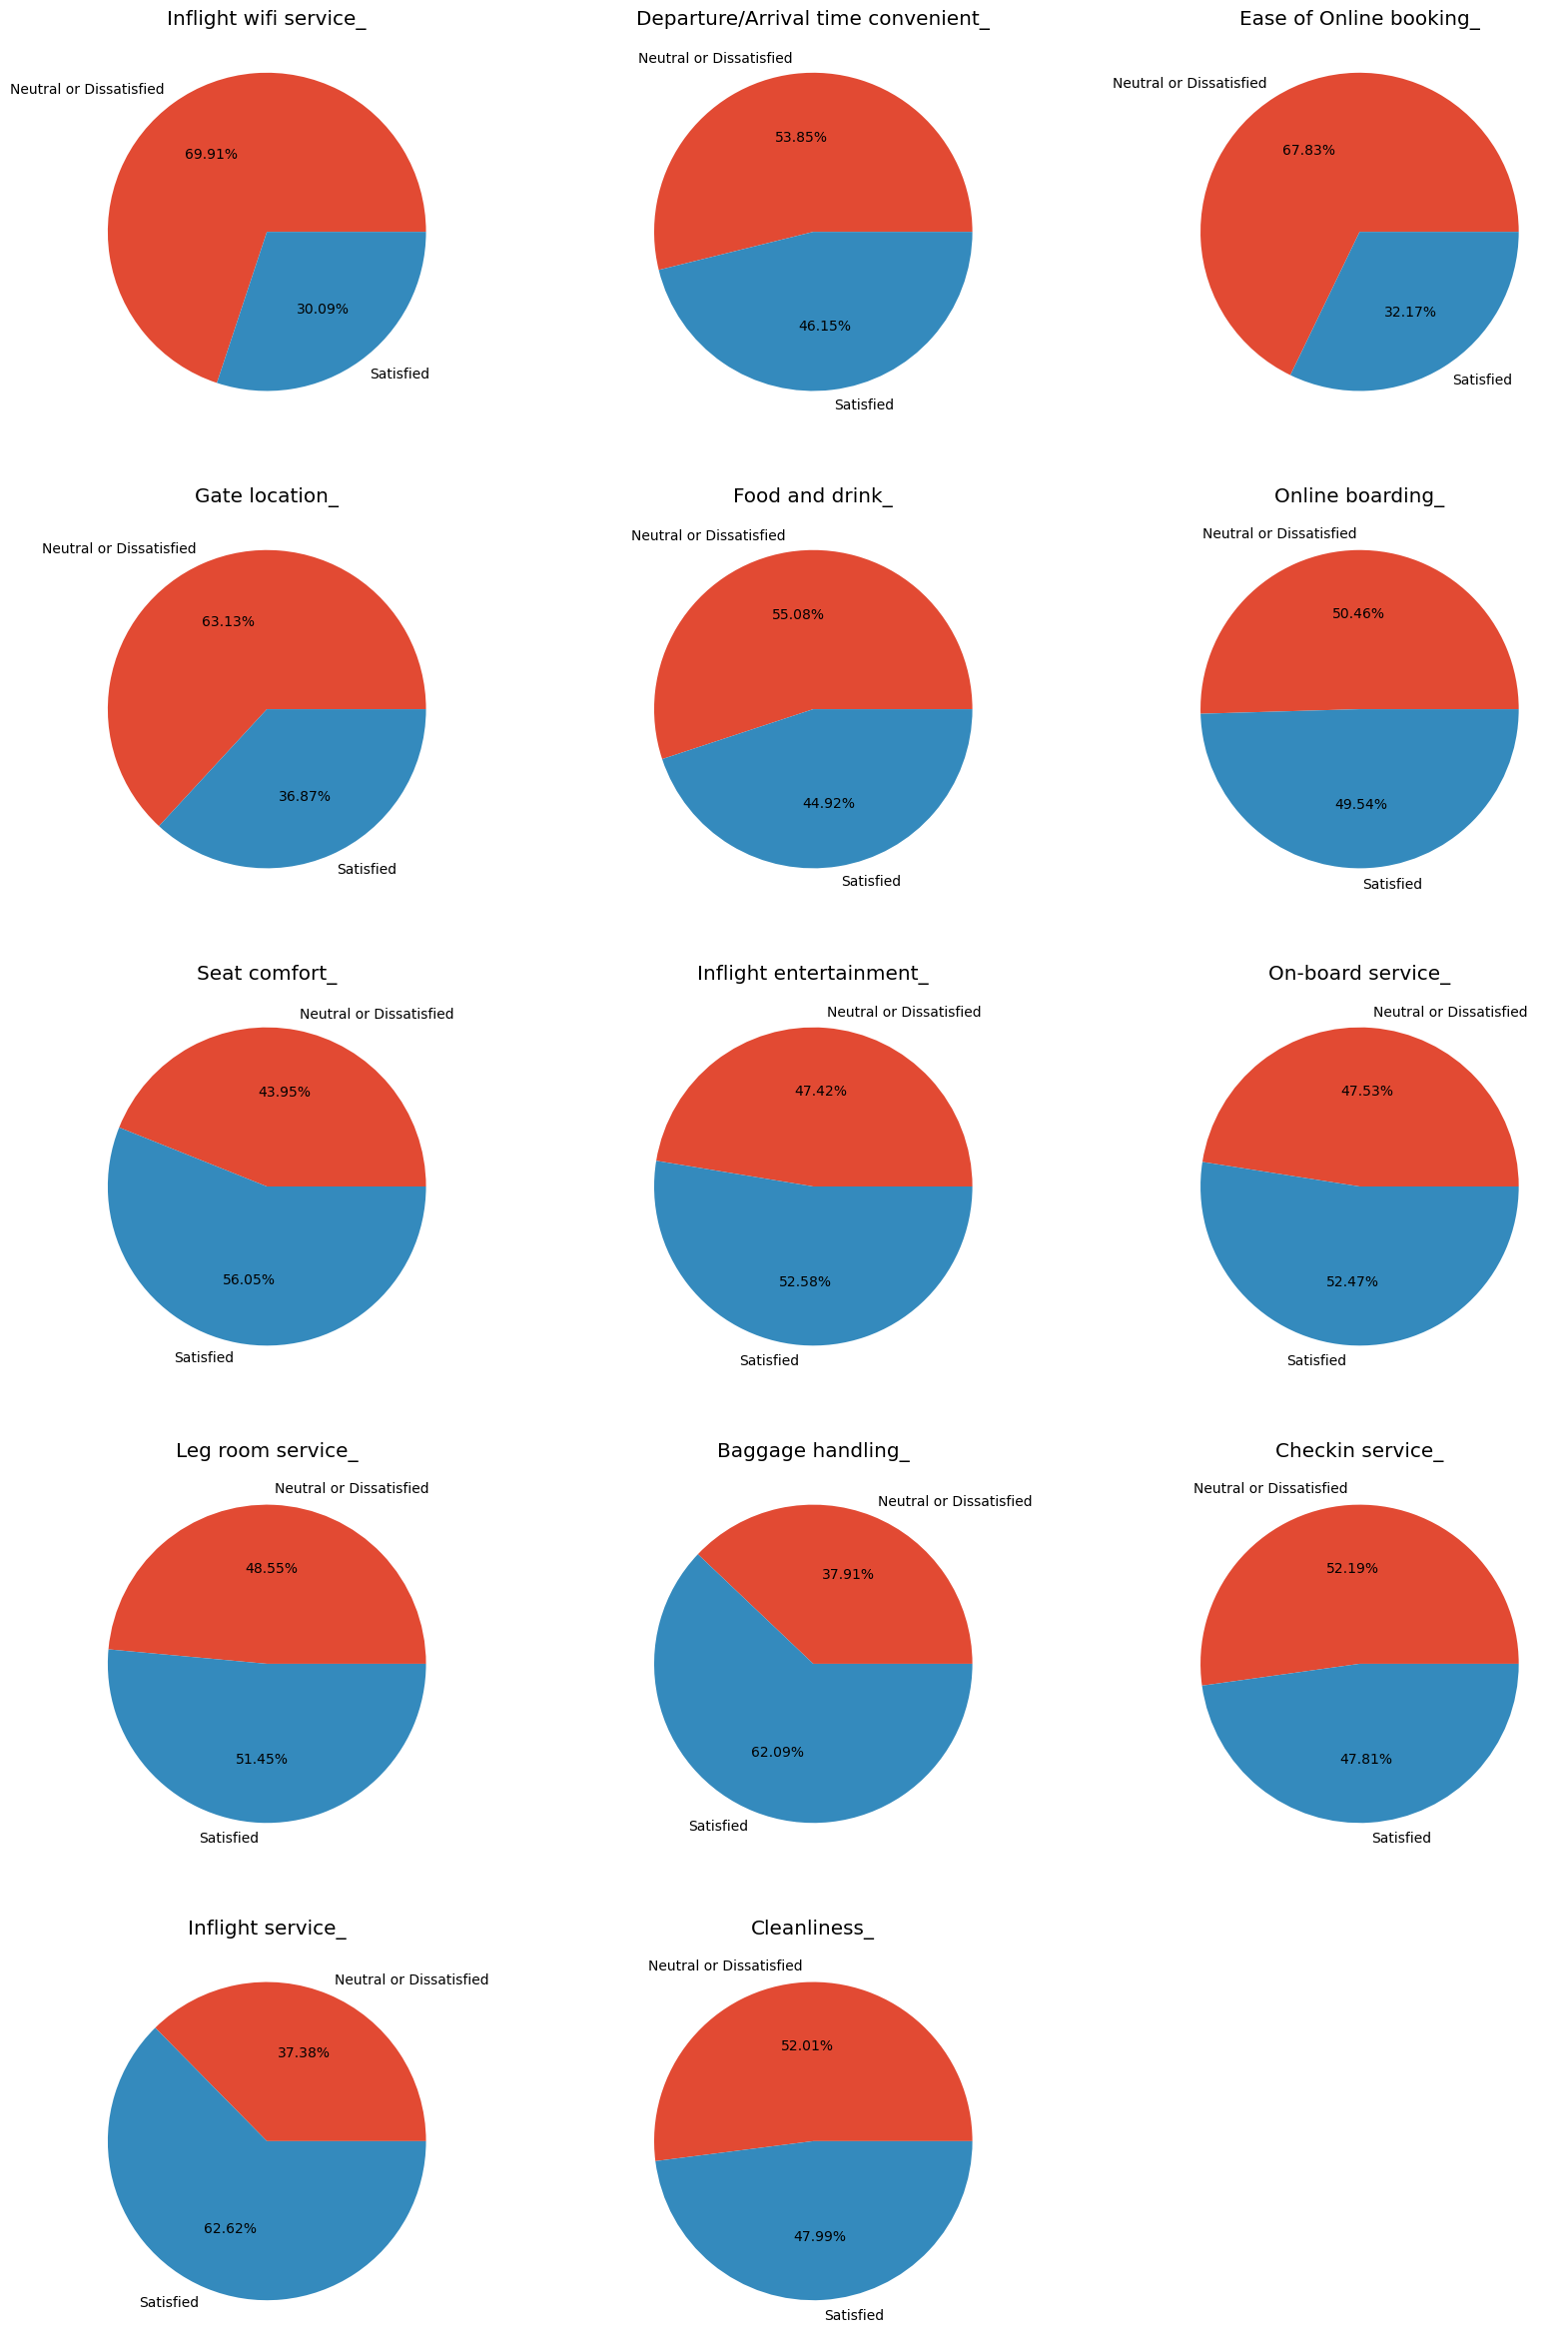

In [38]:
kol4 = df_2.columns
plt.figure(figsize=(20, 30))
count = 1
for k in kol4:
    forgrap = df_2[k].value_counts().sort_index()
    plt.subplot(5, 3, count)
    count+=1
    plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%')
    plt.title(k)

In [39]:
df_transformed = df_2.apply(lambda x: x.value_counts()).T
df_transformed = df_transformed.sort_values('Satisfied', ascending=False)
df_transformed.to_csv('df_trans.csv', index=True)
df_transformed

,Neutral or Dissatisfied,Satisfied
Inflight service_,38843,65061
Baggage handling_,39390,64514
Seat comfort_,45669,58235
Inflight entertainment_,49268,54636
On-board service_,49389,54515
Leg room service_,50448,53456
Online boarding_,52429,51475
Cleanliness_,54036,49868
Checkin service_,54230,49674
Departure/Arrival time convenient_,55955,47949


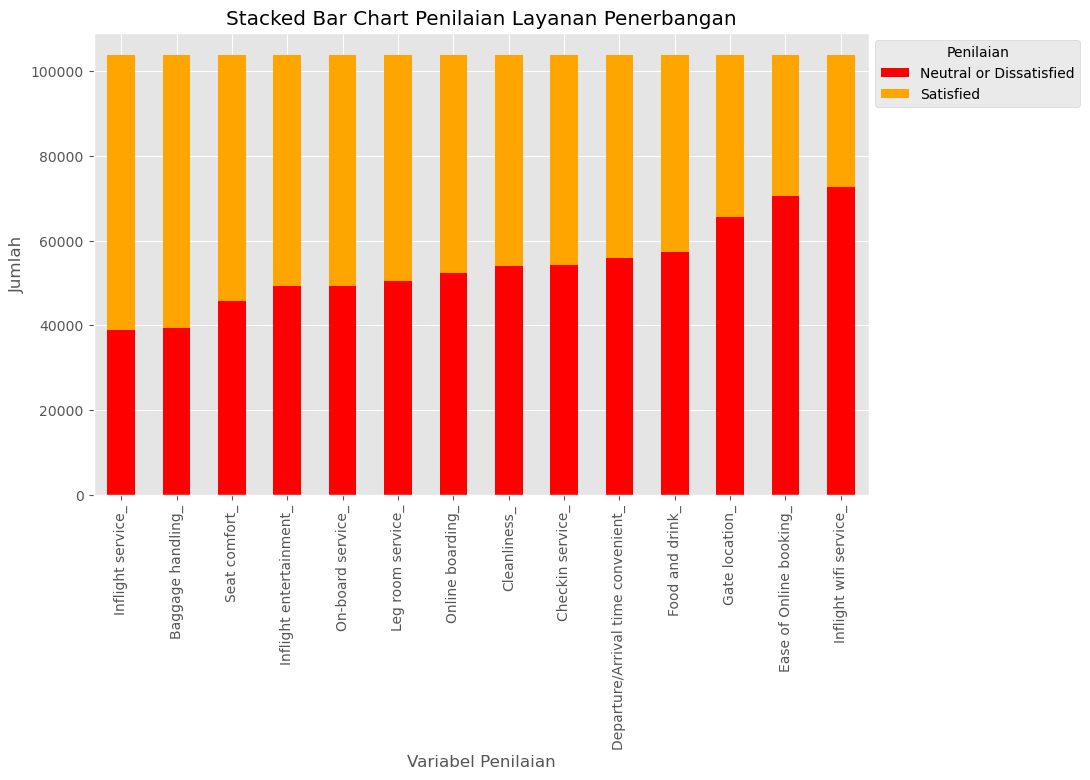

In [47]:
df_transformed.plot(kind='bar', stacked=True, color=['red', 'orange'], figsize=(10, 6))
plt.title('Stacked Bar Chart Penilaian Layanan Penerbangan')
plt.xlabel('Variabel Penilaian')
plt.ylabel('Jumlah')
plt.legend(title='Penilaian', bbox_to_anchor=(1, 1), loc='upper left')

#### Kesimpulan
Berdasarkan grafik batang bertumpuk yang merepresentasikan perbandingan nilai kepuasan setiap fasilitas dan layanan, kita dapat melihat fasilitas mana saya yang cukup memuaskan penumpang dan yang masih harus ditingkatkan untuk menaikkan tingkat kepuasan penumpang

## Apakah flight distance, departure delay, dan arrival delay mempengaruhi kepuasan?

##### Melihat persebaran data

Text(0.5, 1.0, 'Arrival Delay in Minutes')

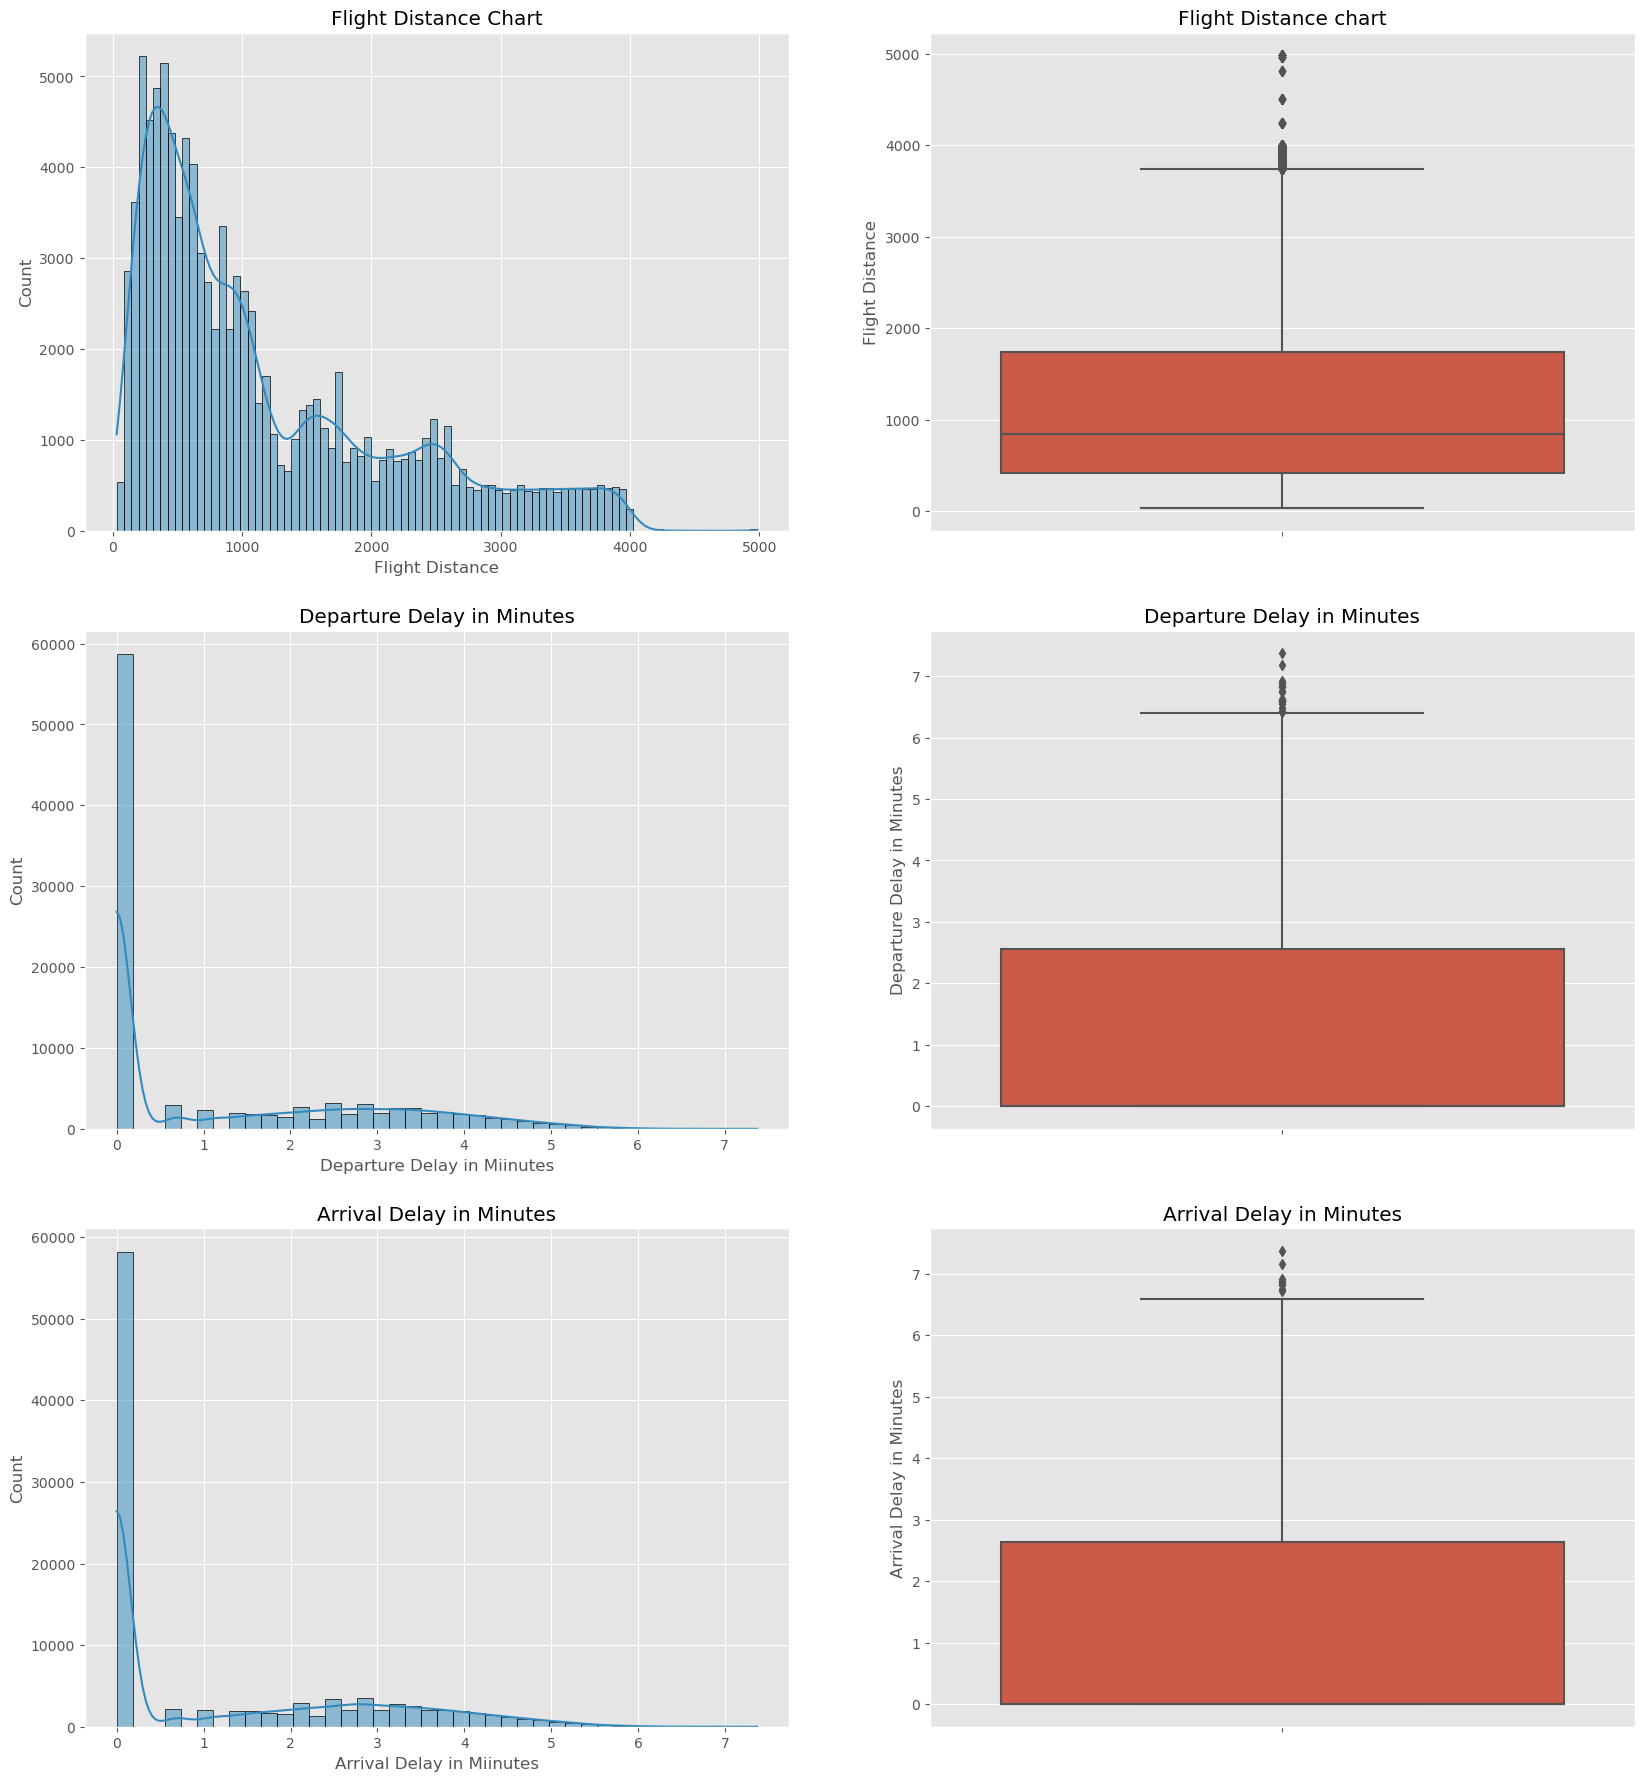

In [48]:
plt.figure(figsize=(20,22))

plt.subplot(3, 2, 1)
sns.histplot(df1["Flight Distance"], edgecolor='black', kde=True)
plt.xlabel("Flight Distance")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Flight Distance Chart")

plt.subplot(3, 2, 2)
sns.boxplot(y=df1["Flight Distance"])
plt.title("Flight Distance chart")

plt.subplot(3, 2, 3)
sns.histplot(np.log(df1["Departure Delay in Minutes"] + 1), bins=40, edgecolor='black', kde=True)
plt.xlabel("Departure Delay in Miinutes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Departure Delay in Minutes")

plt.subplot(3, 2, 4)
sns.boxplot(y=np.log(df1["Departure Delay in Minutes"] + 1))
plt.title("Departure Delay in Minutes")

plt.subplot(3, 2, 5)
sns.histplot(np.log(df1["Arrival Delay in Minutes"] + 1), bins=40, edgecolor='black', kde=True)
plt.xlabel("Arrival Delay in Miinutes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Arrival Delay in Minutes")

plt.subplot(3, 2, 6)
sns.boxplot(y=np.log(df1["Arrival Delay in Minutes"] + 1))
plt.title("Arrival Delay in Minutes")


In [49]:
df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103594.000000
mean,1189.448375,14.815618,15.178678
std,997.147281,38.230901,38.698682
min,31.000000,0.000000,0.000000
25%,414.000000,0.000000,0.000000
50%,843.000000,0.000000,0.000000
75%,1743.000000,12.000000,13.000000
max,4983.000000,1592.000000,1584.000000


Berasarkan grafik persebaran data di atas, kita bisa melihat di fitur Departure delay in minute dan Arrival delay in minute memiliki persebaran yang sangat tidak merata. Mulai dari nilai min, kuartil ke-1, dan median berisi nilai 0. Artinya adalah separuh lebih isi dari fitur tersebut adalah 0 atau tidak ada keterlambatan di keberangkatan dan kedatangan. Jika waktu keterlambatan berpengaruh terhadap fitur satisfaction, seharusnya kategori satisfied lebih banyak daripada neutral or dissatisfied. Kita bisa melihat perbaandingannya per-fitur di bawah ini:

##### Perbandingan Departue Delay in Minutes dan Arrival Delay in Minutes

In [58]:
df_dly = df1.iloc[:, -3:-1]

bbb = [0, 1, float('inf')]
kkk = ['0', '> 0']
df_dly['DD Cat'] = pd.cut(df1['Departure Delay in Minutes'], bins=bbb, labels=kkk, right=False)
df_dly['AD Cat'] = pd.cut(df1['Arrival Delay in Minutes'], bins=bbb, labels=kkk, right=False)
df_dly['satisfaction'] = df1['satisfaction']
df_dly.head(10)

,Departure Delay in Minutes,Arrival Delay in Minutes,DD Cat,AD Cat,satisfaction
0,25,18.0,> 0,> 0,neutral or dissatisfied
1,1,6.0,> 0,> 0,neutral or dissatisfied
2,0,0.0,0,0,satisfied
3,11,9.0,> 0,> 0,neutral or dissatisfied
4,0,0.0,0,0,satisfied
5,0,0.0,0,0,neutral or dissatisfied
6,9,23.0,> 0,> 0,neutral or dissatisfied
7,4,0.0,> 0,0,satisfied
8,0,0.0,0,0,neutral or dissatisfied
9,0,0.0,0,0,neutral or dissatisfied


Text(0.5, 1.0, 'Satisfaction')

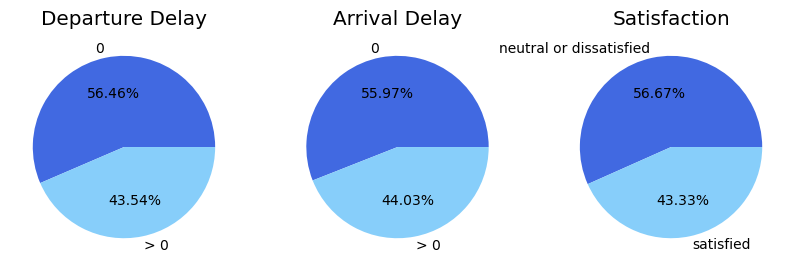

In [59]:
plt.figure(figsize=(10, 11))

plt.subplot(1, 3, 1)
forgrap = df_dly['DD Cat'].value_counts()
plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%', colors=['royalblue', 'lightskyblue'])
plt.title('Departure Delay')

plt.subplot(1, 3, 2)
forgrap = df_dly['AD Cat'].value_counts()
plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%', colors=['royalblue', 'lightskyblue'])
plt.title('Arrival Delay')

plt.subplot(1, 3, 3)
forgrap = df_dly['satisfaction'].value_counts()
plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%', colors=['royalblue', 'lightskyblue'])
plt.title('Satisfaction')

Dari perbandingan di atas, kita bisa menyimpulkan bahwa jumlah penerbangan tanpa keterlambatan hampir sama dengan jumlah penumpang yang merasa kurang memuaskan. Begitu juga dengan penerbangan dengan keterlambatan justru jumlahnya hampir sama dengan jumlah penumpang yang merasa puas. Padahal, seharusnya penumpang lebih merasa puas ketika penerbangan tepat waktu. Selanjutnya mari kita lihat lebih dalam lagi kepuasan penumpang dengan keterlambatan penerbangan dan tanpa keterlambatan penerbangan

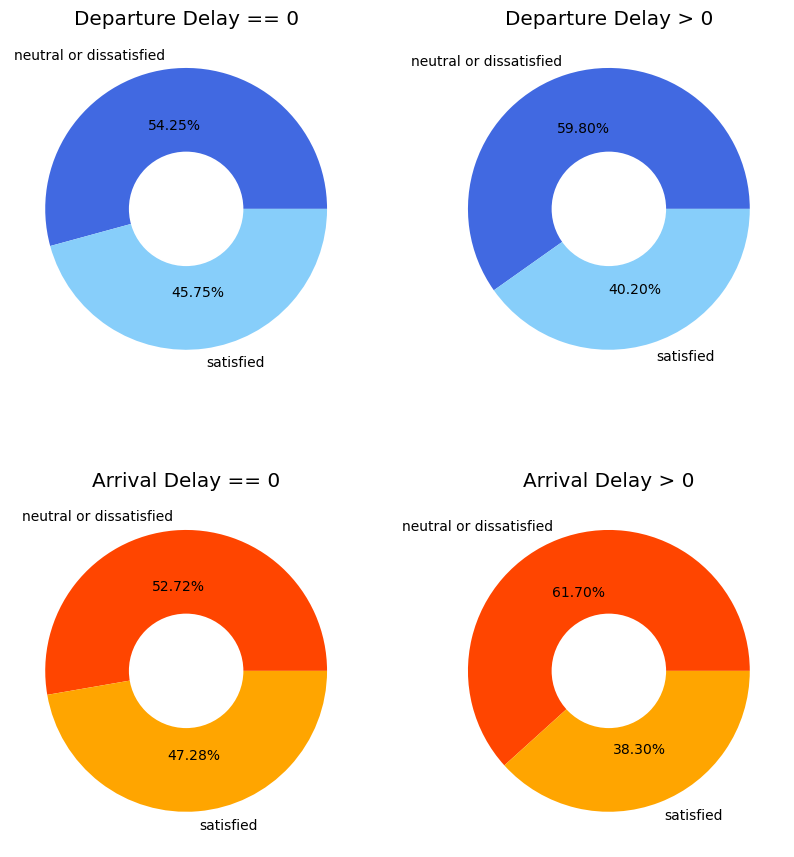

In [60]:
df3 = df1.loc[df['Departure Delay in Minutes'] == 0]
df4 = df1.loc[df['Departure Delay in Minutes'] > 0]
df3a = df1.loc[df['Arrival Delay in Minutes'] == 0]
df4a = df1.loc[df['Arrival Delay in Minutes'] > 0]

plt.figure(figsize=(10, 11))

plt.subplot(2, 2, 1)
forgrap = df3['satisfaction'].value_counts().sort_index()
plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%', colors=['royalblue', 'lightskyblue'])
plt.title('Departure Delay == 0')
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)

plt.subplot(2, 2, 2)
forgrap = df4['satisfaction'].value_counts().sort_index()
plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%', colors=['royalblue', 'lightskyblue'])
plt.title('Departure Delay > 0')
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)

plt.subplot(2, 2, 3)
forgrap = df3a['satisfaction'].value_counts().sort_index()
plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%', colors=['orangered', 'orange'])
plt.title('Arrival Delay == 0')
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)

plt.subplot(2, 2, 4)
forgrap = df4a['satisfaction'].value_counts().sort_index()
plt.pie(forgrap, labels=forgrap.index, autopct='%2.2f%%', colors=['orangered', 'orange'])
plt.title('Arrival Delay > 0')
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)

Setelah melihat grafik lingkaran di atas, ternyata kepuasan satisfied dan neutral or dissatisfied terbagi rata untuk penerbangan tanpa keterlambatan (dep. delay = 0 dan arr. delay = 0) dan penerbangan dengan keterlambatan (dep. deplay > 0 dan ar. delay > 0). Hal ini membuktikan bahwa berdasarkan data ini, Departure Delay in Minute dan Arrival Delay in Minute tidak mempengaruhi kepuasan penumpang.

Text(0.5, 1.0, 'Arrival Delay = 0')

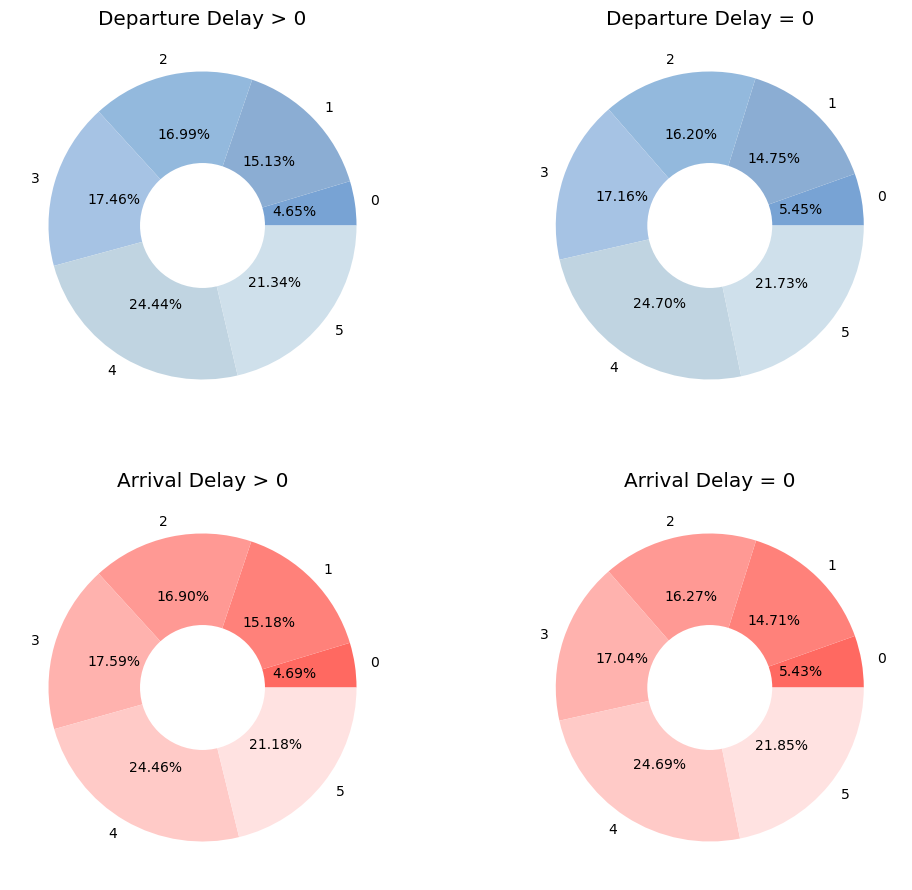

In [62]:
from matplotlib.cm import get_cmap

clr1=['#78A3D4', '#8BADD3', '#93B9DD', '#A6C3E4', '#C0D4E1', '#CFE0EB']
clr2=['#FF6961', '#FF817A', '#FF9994', '#FFB2AE', '#FFCAC7', '#FFE2E1']

plt.figure(figsize=(12,11))

forgrap = df4['Departure/Arrival time convenient'].value_counts()
plt.subplot(2, 2, 1)
plt.pie(forgrap.sort_index(), labels=forgrap.sort_index().index, autopct='%2.2f%%', colors=clr1)
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)
plt.title('Departure Delay > 0')

forgrap = df3['Departure/Arrival time convenient'].value_counts().sort_index()
plt.subplot(2, 2, 2)
plt.pie(forgrap.sort_index(), labels=forgrap.sort_index().index, autopct='%2.2f%%', colors=clr1)
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)
plt.title('Departure Delay = 0')

forgrap = df4a['Departure/Arrival time convenient'].value_counts()
plt.subplot(2, 2, 3)
plt.pie(forgrap.sort_index(), labels=forgrap.sort_index().index, autopct='%2.2f%%', colors=clr2)
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)
plt.title('Arrival Delay > 0')

forgrap = df3a['Departure/Arrival time convenient'].value_counts().sort_index()
plt.subplot(2, 2, 4)
plt.pie(forgrap.sort_index(), labels=forgrap.sort_index().index, autopct='%2.2f%%', colors=clr2)
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(center_circle)
plt.title('Arrival Delay = 0')

Selain satisfaction, ada juga fitur Departure/Arrival time convenient yang seharusnya berhubungan dengan departure delay dan arrival delay. Namun, pada grafik terlihat bahwa departure dan arrival delay > 0 yang seharusnya memiliki nilai 0, 1, atau 2 yang lebih banyak daripada 5 justeru memiliki nilai 4 dan 5 paling banyak, hal ini juga membuktikan kalau departure delay time in minute dan arrival delay in minutes tidak memiliki hubungan dengan fitur satisfaction dan Departure/Arrival time convenient.

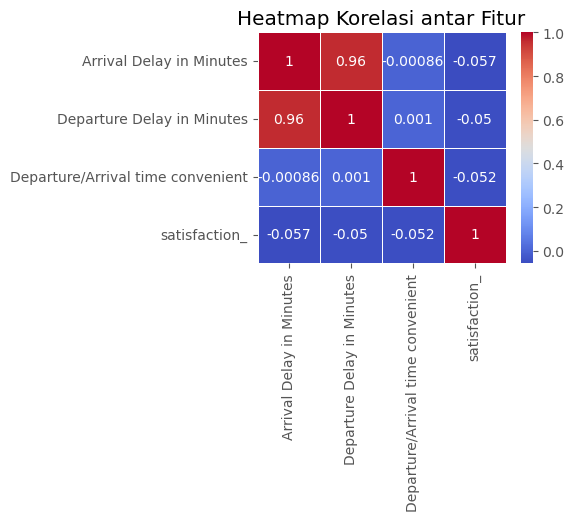

In [63]:
df1['satisfaction_'] = df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

corr = df1[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Departure/Arrival time convenient', 'satisfaction_']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

Dari grafik heatmap korelasi antar fitur-fitur tersebut, kita bisa melihat bahwa arrival delay dan departure delay memiliki korelasi yang sangat tingig bahkan mendekati 1. Hal itu sangat wajar terjadi karena jika suatu penerbangan keberangkatannya tertunda, maka kedatangan di bandara tujuannya juga kemungkinan besar akan tertunda dengan waktu yang hampir sama dengan penundaan keberangkatan. Namun, korelasi antara dua fitur ini tidak mempengaruhi kepuasan penumpang.

##### Melihat perbandingan flight distance

Text(0.5, 1.0, 'Flight Distance chart')

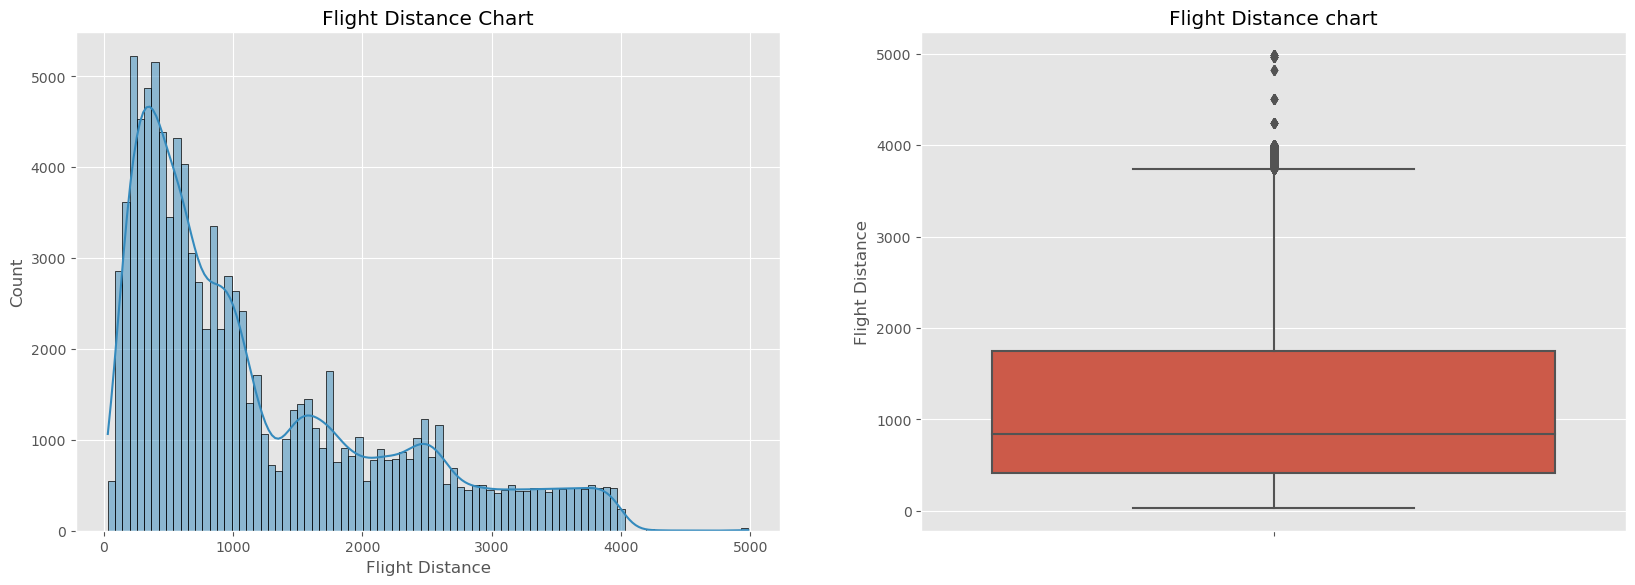

In [64]:
plt.figure(figsize=(20,22))

plt.subplot(3, 2, 1)
sns.histplot(df1["Flight Distance"], edgecolor='black', kde=True)
plt.xlabel("Flight Distance")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Flight Distance Chart")

plt.subplot(3, 2, 2)
sns.boxplot(y=df1["Flight Distance"])
plt.title("Flight Distance chart")

In [65]:
xixi = df[['Flight Distance']].sort_values('Flight Distance', ascending=True).apply(lambda x: x.value_counts()).T
xixi.to_csv('xixi.csv')

Persebaran flight distance sanget besar sehingga akan lebih mudah untuk menganalisisnya jika kita mengkategorikan terlebih dahulu.

##### Mengkategorikan Flight Distance
Eurocontrol, organisasi internasional yang memiliki tujuan utama yaitu pembangunan sebuah sistem pengelolaan lalu lintas udara Eropa mengkategorikan jarak penerbangan menjadi empat. Eurocontrol mengkategorikan penerbangan dengan jarak < 500 menjadi 'sangat pendek', 500-1500 KM menjadi 'pendek', 1500-4000 menjadi 'menengah', dan > 4000 menjadi 'jauh'.

In [67]:
batass = [0, 500, 1500, 4000, float('inf')]
labell = ['sangat pendek', 'pendek', 'menengah', 'jauh']
df_fd = df1[['Flight Distance']]
df_fd['Distance Cat.'] = pd.cut(df_fd['Flight Distance'], bins=batass, labels=labell, right=False)
df_fd['satisfaction'] = df1['satisfaction']
df_fd.head(10)

,Flight Distance,Distance Cat.,satisfaction
0,460,sangat pendek,neutral or dissatisfied
1,235,sangat pendek,neutral or dissatisfied
2,1142,pendek,satisfied
3,562,pendek,neutral or dissatisfied
4,214,sangat pendek,satisfied
5,1180,pendek,neutral or dissatisfied
6,1276,pendek,neutral or dissatisfied
7,2035,menengah,satisfied
8,853,pendek,neutral or dissatisfied
9,1061,pendek,neutral or dissatisfied


In [68]:
df_fd.describe()

,Flight Distance
count,103904.000000
mean,1189.448375
std,997.147281
min,31.000000
25%,414.000000
50%,843.000000
75%,1743.000000
max,4983.000000


Lihat perbandingan antar kategori

Text(0.5, 1.0, 'Flight Distance Chart')

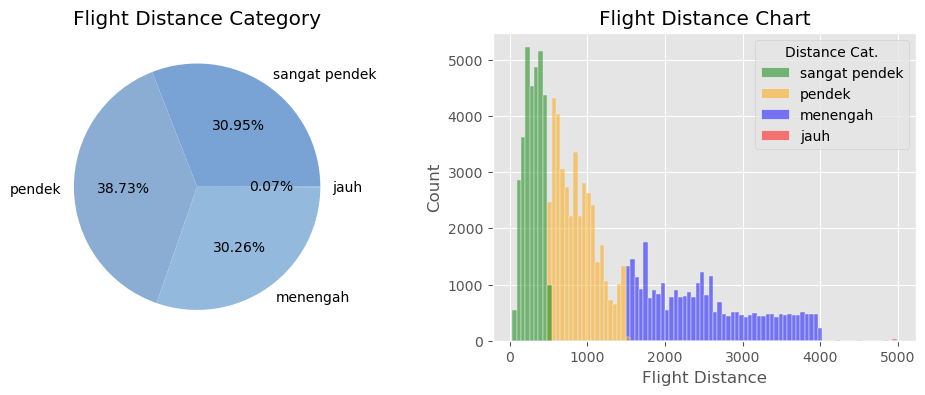

In [69]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.pie(df_fd['Distance Cat.'].value_counts().sort_index(), labels=df_fd['Distance Cat.'].value_counts().sort_index().index, autopct='%2.2f%%', colors=clr1)
plt.title('Flight Distance Category')

colors = {'sangat pendek': 'green', 'pendek': 'orange', 'menengah': 'blue', 'jauh': 'red'}
plt.subplot(1, 2, 2)
sns.histplot(data=df_fd, x='Flight Distance', hue='Distance Cat.', palette=colors)
plt.xlabel("Flight Distance")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Flight Distance Chart")

Berdasarkan grafik di atas, kita bisa melihat bahwa flight distance dengan kategori 'jauh' memiliki jumlah data yang sangat sedikit yaitu 0,07% dari total seluruh data. Berdasarkan grafik boxplot sebelumnya, Flight distance dengan kategori jauh juga termasuk outlier karena memiliki Flight distance di atas 4000.

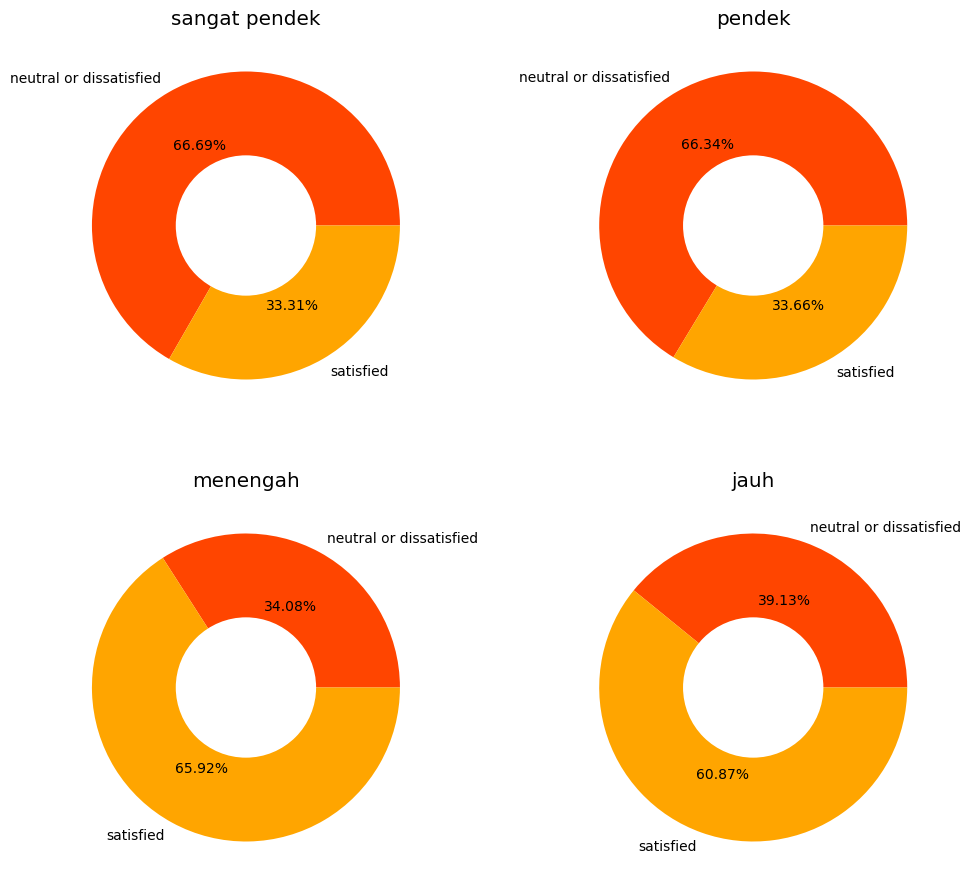

In [70]:
dffd1 = df_fd.loc[df_fd['Distance Cat.'] == 'sangat pendek'].sort_values('Flight Distance', ascending=False)
dffd2 = df_fd.loc[df_fd['Distance Cat.'] == 'pendek'].sort_values('Flight Distance', ascending=False)
dffd3 = df_fd.loc[df_fd['Distance Cat.'] == 'menengah'].sort_values('Flight Distance', ascending=False)
dffd4 = df_fd.loc[df_fd['Distance Cat.'] == 'jauh'].sort_values('Flight Distance', ascending=False)

dt_jrk = [dffd1, dffd2, dffd3, dffd4]
ttl = ['sangat pendek', 'pendek', 'menengah', 'jauh']

plt.figure(figsize=(12,11))
count = 1

for dt in dt_jrk:
    plt.subplot(2, 2, count)
    plt.pie(dt['satisfaction'].value_counts().sort_index(), labels=dt['satisfaction'].value_counts().sort_index().index, autopct='%2.2f%%', colors=['orangered', 'orange'])
    center_circle = plt.Circle((0, 0), 0.45, color='white', fc='white', linewidth=1.25)
    plt.gca().add_artist(center_circle)
    plt.title(ttl[count-1])
    count+=1

Berdasarkan grafik di atas, ternyata jarak penerbangan memiliki pengaruh terhadap kepuasan pelanggan. Bisa dilihat pada grafik pada penerbangan 'menengah' dan 'jauh' penumpang yang puas mencapai 60% lebih. Begitu pun sebaliknya. Pada grafik, penerbangan 'sangat pendek' dan 'pendek' memiliki penumpang yang kurang puas mencapai 60% lebih juga. Untuk lebih jelasnya, kita bisa membuat grafik korelasinya.

Text(0.5, 1.0, 'Heatmap Korelasi antar Fitur')

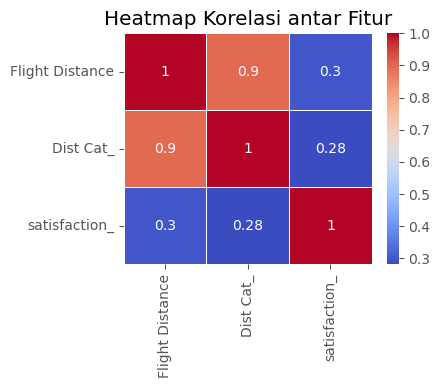

In [195]:
df_fd['satisfaction_'] = df_fd['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})
df_fd['Dist Cat_'] = df_fd['Distance Cat.'].replace({'sangat pendek': 0, 'pendek': 500, 'menengah': 1500, 'jauh': 4000})
df_fd['Dist Cat_'] = df_fd['Dist Cat_'].astype(int)

corr2 = df_fd[['Flight Distance', 'Dist Cat_', 'satisfaction_']]
kor = corr2.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(kor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur')

##### Coba hapus baris dengan kategori jauh
Kategori jarak 'jauh' semuanya adalah outlier. Jadi, di sini kita coba menganalisis kembali dengan menghapus baris dengan kategori jarak 'jauh' atau jarak penerbangan lebih atau sama dengan 4000

In [73]:
batass = [0, 500, 1500, 4000]
labell = ['sangat pendek', 'pendek', 'menengah']
df_nj = df1[['Flight Distance']]
df_nj['Distance Cat.'] = pd.cut(df_nj['Flight Distance'], bins=batass, labels=labell, right=False)
df_nj['satisfaction'] = df1['satisfaction']
df_nj['Distance Cat.'].unique()

df_nj = df_nj.drop(df_nj[df_nj['Flight Distance'] >= 4000].index)

Text(0.5, 1.0, 'Flight Distance Chart')

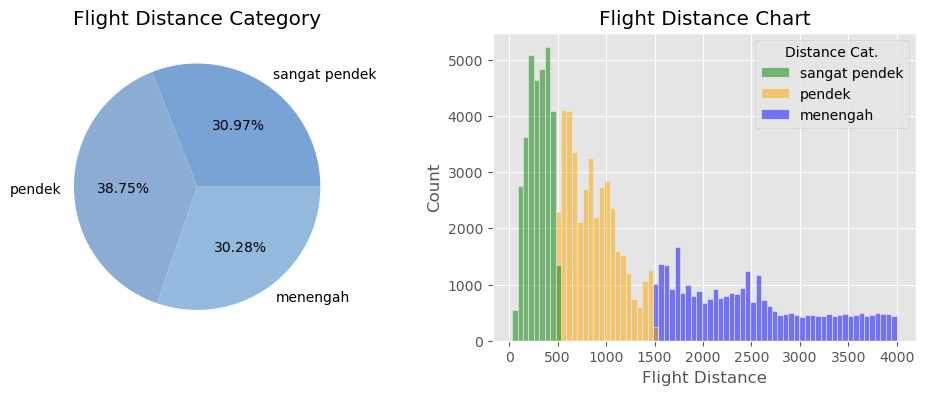

In [74]:
plt.figure(figsize=(12, 4))
clr1=['#78A3D4', '#8BADD3', '#93B9DD', '#A6C3E4', '#C0D4E1', '#CFE0EB']

plt.subplot(1, 2, 1)
plt.pie(df_nj['Distance Cat.'].value_counts().sort_index(), labels=df_nj['Distance Cat.'].value_counts().sort_index().index, autopct='%2.2f%%', colors=clr1)
plt.title('Flight Distance Category')

colors = {'sangat pendek': 'green', 'pendek': 'orange', 'menengah': 'blue'}
plt.subplot(1, 2, 2)
sns.histplot(data=df_nj, x='Flight Distance', hue='Distance Cat.', palette=colors)
plt.xlabel("Flight Distance")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Flight Distance Chart")

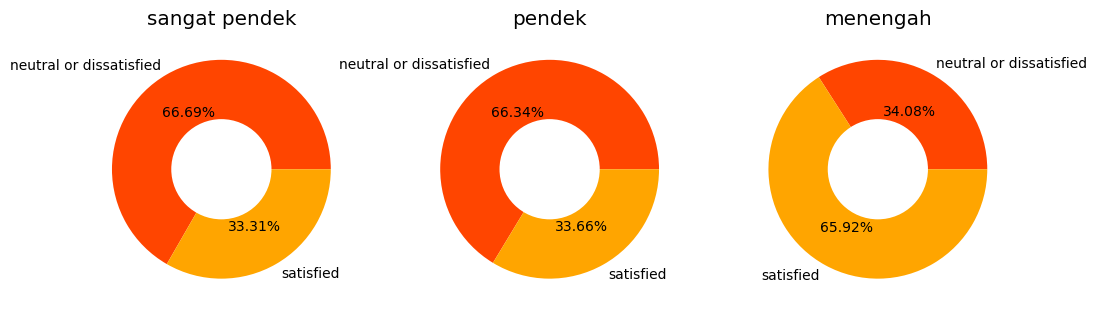

In [75]:
dffd1 = df_nj.loc[df_nj['Distance Cat.'] == 'sangat pendek'].sort_values('Flight Distance', ascending=False)
dffd2 = df_nj.loc[df_nj['Distance Cat.'] == 'pendek'].sort_values('Flight Distance', ascending=False)
dffd3 = df_nj.loc[df_nj['Distance Cat.'] == 'menengah'].sort_values('Flight Distance', ascending=False)

dt_jrk = [dffd1, dffd2, dffd3]
ttl = ['sangat pendek', 'pendek', 'menengah']

plt.figure(figsize=(12,11))
count = 1

for dt in dt_jrk:
    plt.subplot(1, 3, count)
    plt.pie(dt['satisfaction'].value_counts().sort_index(), labels=dt['satisfaction'].value_counts().sort_index().index, autopct='%2.2f%%', colors=['orangered', 'orange'])
    center_circle = plt.Circle((0, 0), 0.45, color='white', fc='white', linewidth=1.25)
    plt.gca().add_artist(center_circle)
    plt.title(ttl[count-1])
    count+=1

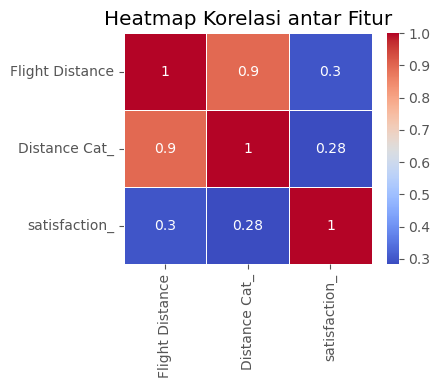

In [197]:
df_nj['satisfaction_'] = df_nj['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})
df_nj['Distance Cat_'] = df_nj['Distance Cat.'].replace({'sangat pendek': 0, 'pendek': 500, 'menengah': 1500})
df_nj['Distance Cat_'] = df_nj['Distance Cat_'].astype(int)

corr3 = df_nj[['Flight Distance', 'Distance Cat_', 'satisfaction_']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr3, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

Berdasarkan dua analisis di atas, kita bisa lihat bahwa jarak penerbangan tidak terlalu berpengaruh dalam kepuasan berdasarkan korelasi. Tingkat korelasi kategori jarak penerbangan dengan kepuasan hanya 0.28. Sementara itu, korelasi jarak penerbangan dengan kepuasan juga hanya 0.3. Dari sini kita bisa menyimpulkan bahwa jarak penerbangan tidak terlalu berpengaruh dengan kepuasan penumpang. Tetapi, berdasarkan grafik donat sebelumnya kita bisa melihat kalau penerbangan dengan jarak yang lebih jauh memiliki kepuasan yang tinggi. Hal itu menunjukkan kalau maskapai ini sudah memiliki layanan dan fasilitas yang sangat baik untuk perjalanan jauh. Sebaliknya, kepuasan pelanggan pada penerbangan yang lebih dekat justru hanya sedikit. Hal itu menunjukkan bahwa fasilitas atau layanan penerbangan jarak dekat masih kurang baik dan harus ditingkatkan. Jadi, disarankan maskapai mengutamakan perbaikan fasilitas untuk penerbangan jarak dekat.

In [77]:
df2 = df1.copy()
df2['gndr'] = df1['Gender'].replace({'Male': 1, 'Female': 0})
df2['cust. type'] = df1['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0})
df2['tp of travel'] = df1['Type of Travel'].replace({'Personal Travel': 1, 'Business travel': 0})
df2['claass'] = df1['Class'].replace({'Business': 2, 'Eco': 1, 'Eco Plus': 0})
df2['satisfaction_'] = df1['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

df2 = df2.drop('Gender', axis=1)
df2 = df2.drop('Customer Type', axis=1)
df2 = df2.drop('Type of Travel', axis=1)
df2 = df2.drop('Class', axis=1)
df2 = df2.drop('satisfaction', axis=1)

df2.head()

,Age,Age Category,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_,gndr,cust. type,tp of travel,claass
0,13,Teenager,460,3,4,3,1,5,3,5,...,4,5,5,25,18.0,0,1,1,1,0
1,25,Adult,235,3,2,3,3,1,3,1,...,1,4,1,1,6.0,0,1,0,0,2
2,26,Adult,1142,2,2,2,2,5,5,5,...,4,4,5,0,0.0,1,0,1,0,2
3,25,Adult,562,2,5,5,5,2,2,2,...,1,4,2,11,9.0,0,0,1,0,2
4,61,Old,214,3,3,3,3,4,5,5,...,3,3,3,0,0.0,1,1,1,0,2


In [78]:
df1['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

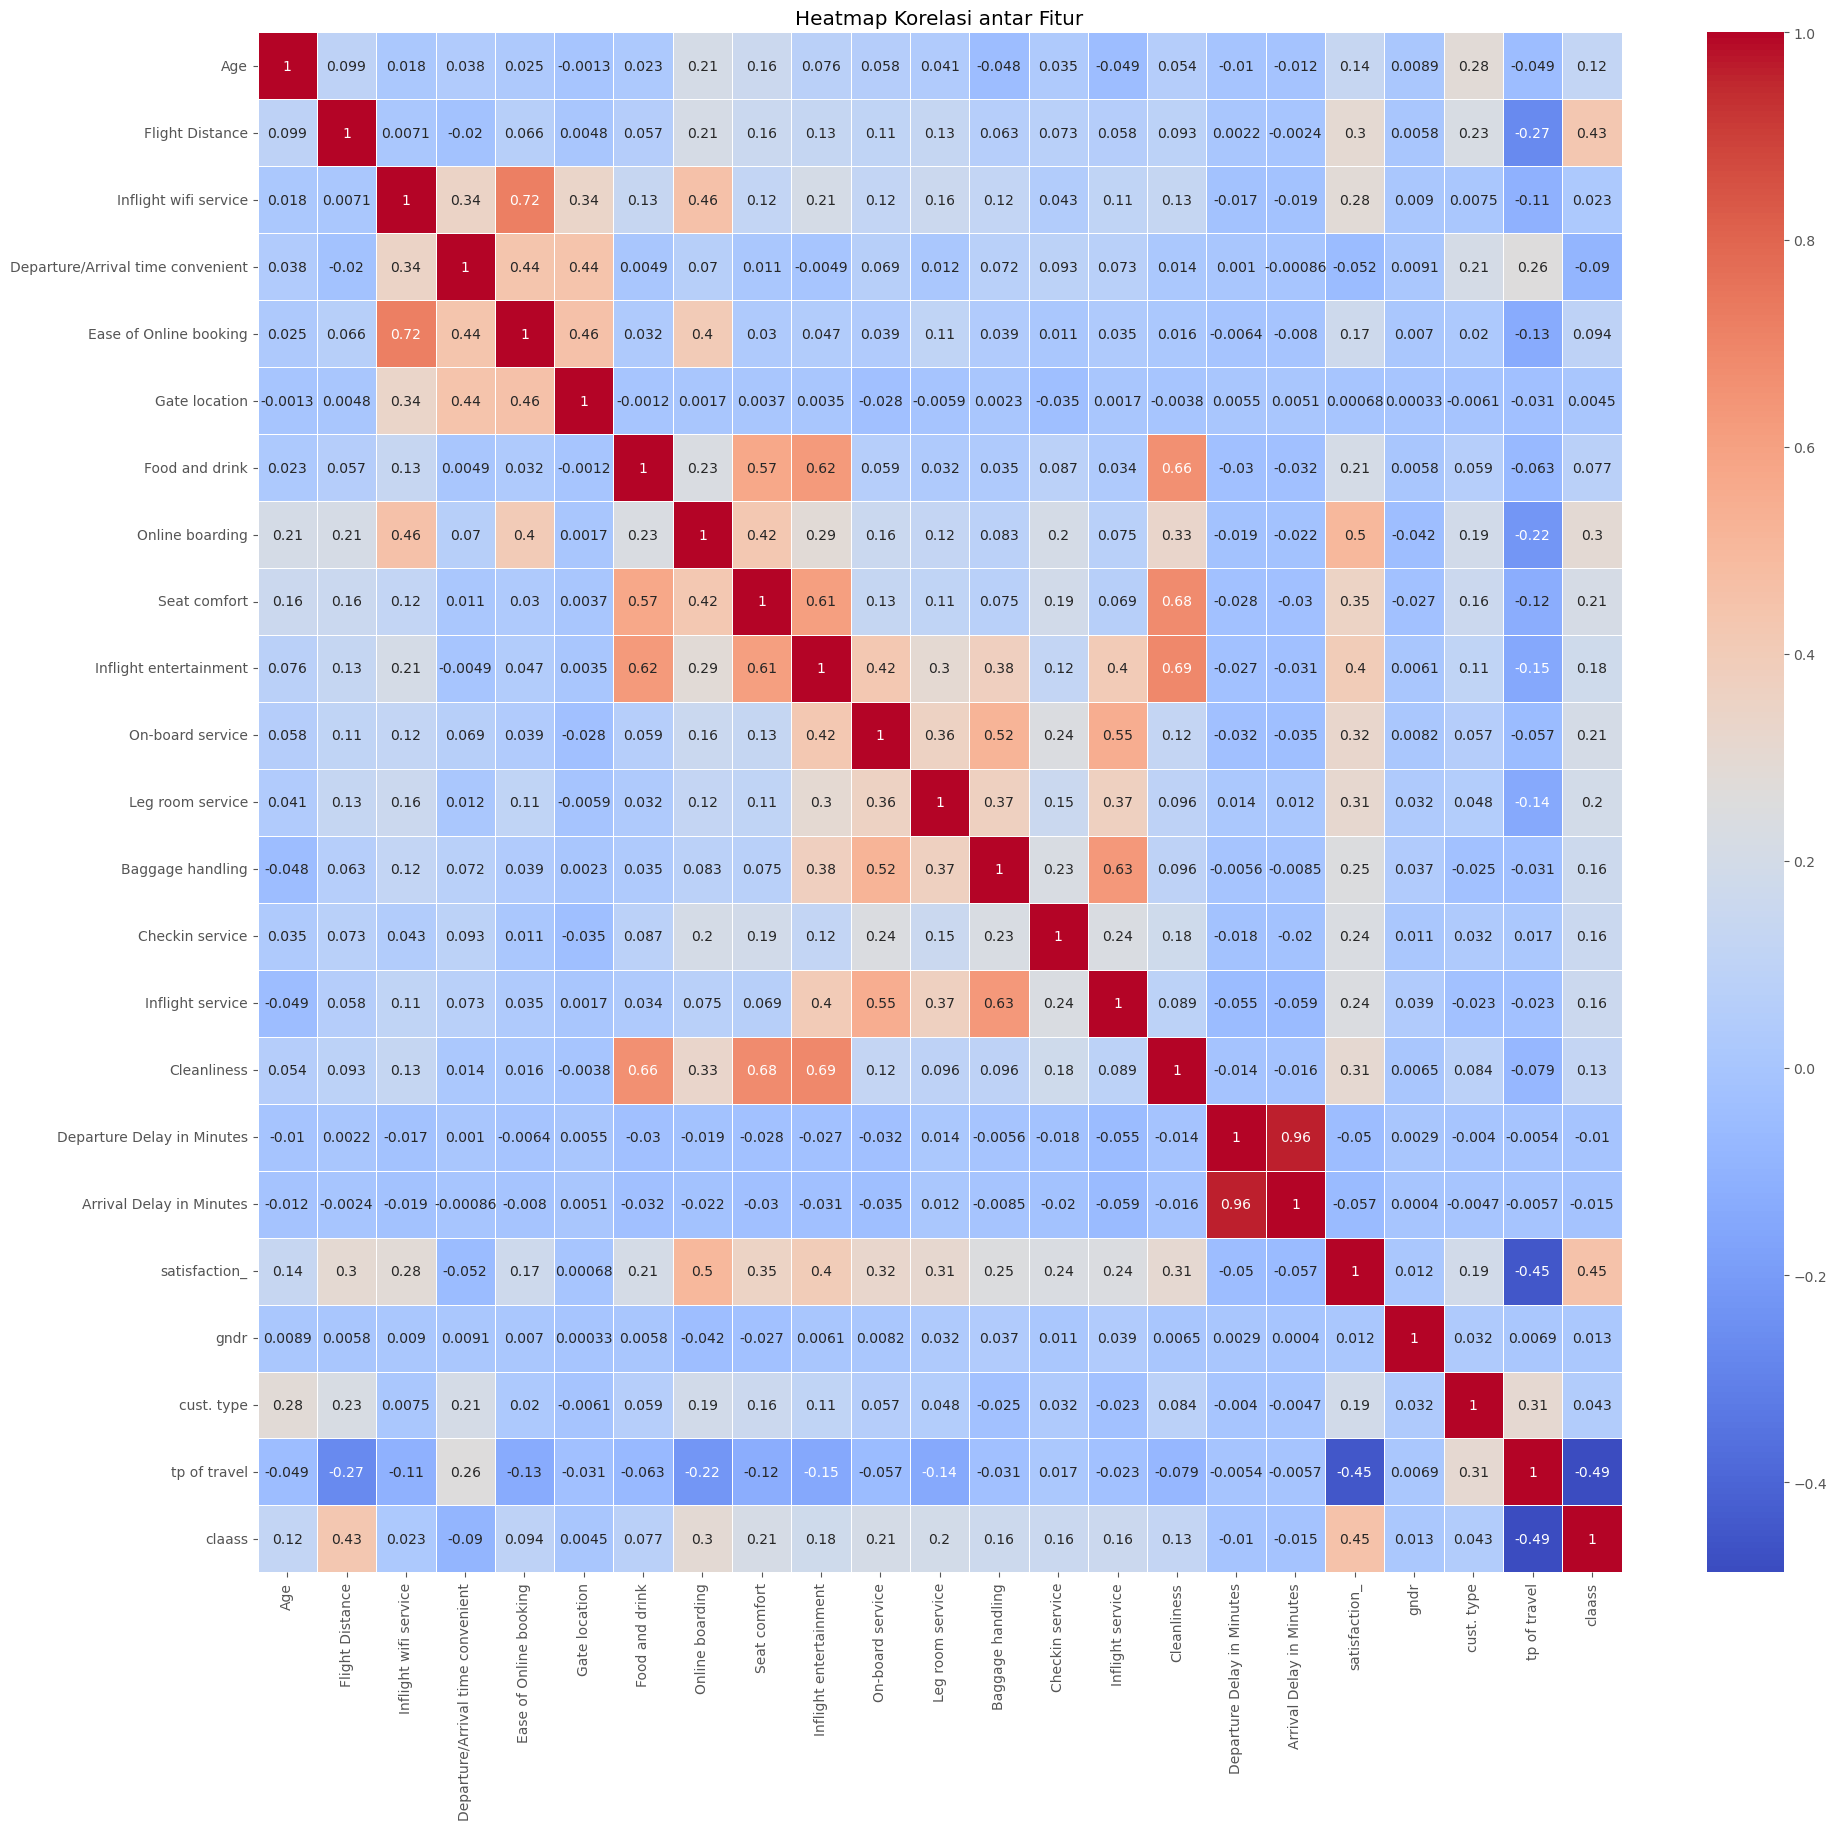

In [79]:
korelasi = df2.corr()
plt.figure(figsize=(22, 20))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

## Apakah kelas penerbangan mempengaruhi kepuasan pelanggan

In [80]:
dftot = df1[['Class', 'satisfaction']]
dftot

,Class,satisfaction
0,Eco Plus,neutral or dissatisfied
1,Business,neutral or dissatisfied
2,Business,satisfied
3,Business,neutral or dissatisfied
4,Business,satisfied
...,...,...
103899,Eco,neutral or dissatisfied
103900,Business,satisfied
103901,Business,neutral or dissatisfied
103902,Eco,neutral or dissatisfied


In [82]:
df_e = dftot.loc[dftot['Class'] == 'Eco']
df_ep = dftot.loc[dftot['Class'] == 'Eco Plus']
df_b = dftot.loc[dftot['Class'] == 'Business']

Text(0.5, 1.0, 'Economy Class')

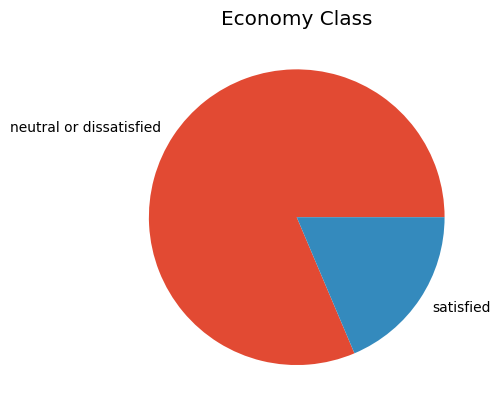

In [83]:
plt.pie(df_e['satisfaction'].value_counts(), labels=df_e['satisfaction'].value_counts().index)
plt.title('Economy Class')

Text(0.5, 1.0, 'Economy Plus Class')

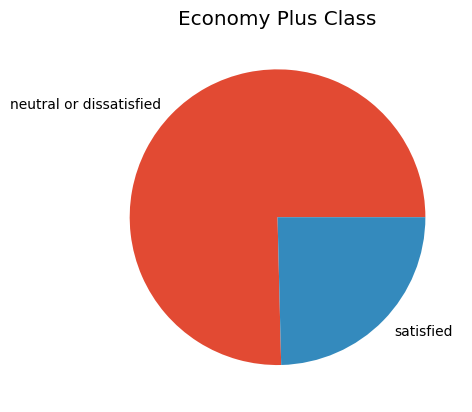

In [84]:
plt.pie(df_ep['satisfaction'].value_counts(), labels=df_ep['satisfaction'].value_counts().index)
plt.title('Economy Plus Class')

Text(0.5, 1.0, 'Business Class')

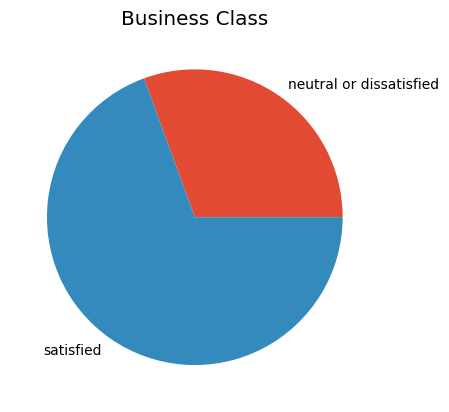

In [85]:
plt.pie(df_b['satisfaction'].value_counts().sort_index(), labels=df_b['satisfaction'].value_counts().sort_index().index)
plt.title('Business Class')

Berdasarkan tiga grafik pie di atas, dapat disimpulkan bahwa semakin tinggi kelas penerbangan yang digunakan, maka semakin tinggi juga tingkat kepuasannya. Dari kesimpulan ini kita tahu bahwa kita harus fokus memperbaiki fasilitas dan layanan di kelas ekonomi dan ekonomi plus terlebih dahulu.

# Data Modeling

Tahapan ini dimana machine learning berperan. Untuk tipe modeling yang digunakan yaitu Supervised Learning Classifiacation. Algoritma modeling yang akan digunakan :
* KNN
* Decision Tree
* SVM
* Naive Bayes
* Logistic Regression
* Ada Boost
* Gradient Boosting


sebelum kesitu mari melihat datanya kembali


In [120]:
df1.iloc[:, 0:20].head(10)

,Gender,Customer Type,Age,Type of Travel,Age Category,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
0,Male,Loyal Customer,13,Personal Travel,Teenager,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5
1,Male,disloyal Customer,25,Business travel,Adult,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4
2,Female,Loyal Customer,26,Business travel,Adult,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4
3,Female,Loyal Customer,25,Business travel,Adult,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4
4,Male,Loyal Customer,61,Business travel,Old,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3
5,Female,Loyal Customer,26,Personal Travel,Adult,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4
6,Male,Loyal Customer,47,Personal Travel,Adult,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5
7,Female,Loyal Customer,52,Business travel,Adult,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5
8,Female,Loyal Customer,41,Business travel,Adult,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1
9,Male,disloyal Customer,20,Business travel,Adult,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3


In [121]:
df1.iloc[:, 20:25].head(10)

,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,5,25,18.0,neutral or dissatisfied
1,1,1,6.0,neutral or dissatisfied
2,5,0,0.0,satisfied
3,2,11,9.0,neutral or dissatisfied
4,3,0,0.0,satisfied
5,1,0,0.0,neutral or dissatisfied
6,2,9,23.0,neutral or dissatisfied
7,4,4,0.0,satisfied
8,2,0,0.0,neutral or dissatisfied
9,2,0,0.0,neutral or dissatisfied


Import library preprocessing yang dibutuhkan

In [122]:
mms = MinMaxScaler()
le = LabelEncoder()


minmek = ['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']
cat_col = ['Gender', 'Customer Type', 'Age Category', 'Class', 'Type of Travel','satisfaction']

Transformasikan datanya

In [123]:
for col in minmek:
    df1[minmek] = mms.fit_transform(df1[minmek])
    
for cul in cat_col:
    df1[cul] = le.fit_transform(df1[cul])

In [124]:
df1.head(10)

,Gender,Customer Type,Age,Type of Travel,Age Category,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0.076923,1,3,2,0.086632,3,4,3,...,5,4,3,4,4,5,5,0.015704,0.011364,0
1,1,1,0.230769,0,0,0,0.041195,3,2,3,...,1,1,5,3,1,4,1,0.000628,0.003788,0
2,0,0,0.243590,0,0,0,0.224354,2,2,2,...,5,4,3,4,4,4,5,0.000000,0.000000,1
3,0,0,0.230769,0,0,0,0.107229,2,5,5,...,2,2,5,3,1,4,2,0.006910,0.005682,0
4,1,0,0.692308,0,2,0,0.036955,3,3,3,...,3,3,4,4,3,3,3,0.000000,0.000000,1
5,0,0,0.243590,1,0,1,0.232027,3,4,2,...,1,3,4,4,4,4,1,0.000000,0.000000,0
6,1,0,0.512821,1,0,1,0.251414,2,4,2,...,2,3,3,4,3,5,2,0.005653,0.014520,0
7,0,0,0.576923,0,0,0,0.404685,4,3,4,...,5,5,5,5,4,5,4,0.002513,0.000000,1
8,0,0,0.435897,0,0,0,0.165994,1,2,2,...,1,1,2,1,4,1,2,0.000000,0.000000,0
9,1,1,0.166667,0,0,1,0.207997,3,3,3,...,2,2,3,4,4,3,2,0.000000,0.000000,0


Memisahkan antara dataset train dan test

In [125]:
X = df1.drop(['satisfaction'], axis=1)
y = df1['satisfaction']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## KNN algorithm

Pertama-tama cari tahu terlebih dahulu nilai k yang cocok dengan menggunakan cross validation score 

In [127]:
n_neighbors_range = range(1, 11)

mean_scores = []

for n_neighbors in n_neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')  
    mean_scores.append(scores.mean())


optimal_n_neighbors = n_neighbors_range[mean_scores.index(max(mean_scores))]

print("Nilai n_neighbors optimal:", optimal_n_neighbors)

Nilai n_neighbors optimal: 7


In [128]:
knn7 = KNeighborsClassifier(n_neighbors=7)

knn7.fit(X_train, y_train)

y_pred7 = knn7.predict(X_test)

accuracy7 = accuracy_score(y_test, y_pred7)
print("KNN (7) Accuracy : ", accuracy7)

cm7 = confusion_matrix(y_test, y_pred7)
print("Total confussion matrix score on KNN (7)")
print(cm7)

cr7 = classification_report(y_test, y_pred7)
print("Total score from classification report on KNN (7) ")
print(cr7)

KNN (7) Accuracy :  0.9290698233963717
Total confussion matrix score on KNN (7)
[[11261   452]
 [ 1022  8046]]
Total score from classification report on KNN (7) 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11713
           1       0.95      0.89      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781



In [129]:
print("KNN model evaluation")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred7))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred7))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred7))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred7))

KNN model evaluation
Accuracy :  0.92907
Precision :  0.94681
Recall :  0.88730
F1 Score :  0.91609


Memeriksa apakah model ini overfitting apa tidak?

In [130]:
print("Skor dataset train : {:.5f}".format(knn7.score(X_train, y_train)))
print("Skor dataset test : {:.5f}".format(knn7.score(X_test, y_test)))

Skor dataset train : 0.94490
Skor dataset test : 0.92907


## Logistic Regression Algorithm

In [131]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_loreg = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_loreg)
print("Logistic Regression Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_loreg)
print("Total confussion matrix score on Logistic Regression")
print(cm)

cr = classification_report(y_test, y_pred_loreg)
print("Total score from classification report on Logistic Regression")
print(cr)

Logistic Regression Accuracy: 0.8774842404119148
Total confussion matrix score on Logistic Regression
[[10601  1112]
 [ 1434  7634]]
Total score from classification report on Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [132]:
print("Logistic Regression model evaluation")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_loreg))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_loreg))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_loreg))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_loreg))

Logistic Regression model evaluation
Accuracy :  0.87748
Precision :  0.87286
Recall :  0.84186
F1 Score :  0.85708


Memeriksa apakah model ini overfitting apa tidak

In [133]:
print("Skor dataset train : {:.5f}".format(logreg.score(X_train, y_train)))
print("Skor dataset test : {:.5f}".format(logreg.score(X_test, y_test)))

Skor dataset train : 0.87456
Skor dataset test : 0.87748


## Decision Tree Algorithm


In [134]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(class_report)

Decision Tree Accuracy: 0.9461046147923584
Confusion Matrix:
[[11136   577]
 [  543  8525]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [135]:
print("Decision tree model evaluation")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_dt))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_dt))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_dt))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_dt))

Decision tree model evaluation
Accuracy :  0.94610
Precision :  0.93661
Recall :  0.94012
F1 Score :  0.93836


Mengecek apakah model ini overfitting apa tidak

In [136]:
print("Skor dataset train : {:.5f}".format(decision_tree.score(X_train, y_train)))
print("Skor dataset test : {:.5f}".format(decision_tree.score(X_test, y_test)))

Skor dataset train : 1.00000
Skor dataset test : 0.94610


Mencoba hyperparameter tuning Decision tree menggunakan Grid Search CV

In [200]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Kriteria pemilihan fitur (gini impurity atau entropy)
    'splitter': ['best', 'random'],  # Strategi pemisahan pada setiap node (pemilihan fitur terbaik atau acak)
    'max_depth': [None, 10, 20, 30, 40, 50],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel yang diperlukan untuk membagi node
    'min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel yang diperlukan di setiap leaf node
}

In [202]:
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='accuracy')

# Melatih model dengan Grid Search
grid_search_dt.fit(X_train, y_train)

# Mendapatkan kombinasi hyperparameter terbaik
best_params_dt = grid_search.best_params_
print("Best Hyperparameters:", best_params_dt)

# Membuat prediksi dengan model terbaik
best_model_dt = grid_search.best_estimator_
y_pred_dtuned = best_model_dt.predict(X_test)

# Evaluasi model
accuracy_dtuned = accuracy_score(y_test, y_pred_dtuned)
print("Accuracy:", accuracy_dtuned)

conf_matrix_dtuned = confusion_matrix(y_test, y_pred_dtuned)
print("Confusion Matrix:")
print(conf_matrix_dtuned)

class_report_dtuned = classification_report(y_test, y_pred_dtuned)
print("Classification Report:")
print(class_report_dtuned)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9631394061883451
Confusion Matrix:
[[11489   224]
 [  542  8526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Mencoba validasi silang

In [203]:
best_model_dt = grid_search_dt.best_estimator_

cv_scores = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.95025564 0.94658647 0.95097744 0.95506497 0.95181665]
Mean CV Score: 0.9509402331623091
Standard Deviation of CV Scores: 0.0027278882621730584


## Naive Bayes Algorithm

In [137]:
nb = GaussianNB()
nb.fit(X_train, y_train)


y_pred_nb = nb.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(class_report_nb)

Naive Bayes Accuracy: 0.8609306578124248
Confusion Matrix:
[[10457  1256]
 [ 1634  7434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     11713
           1       0.86      0.82      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



In [138]:
print("Naive Bayes model evaluation")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_nb))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_nb))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_nb))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_nb))

Naive Bayes model evaluation
Accuracy :  0.86093
Precision :  0.85547
Recall :  0.81981
F1 Score :  0.83726


Mengecek model ini apakah overfitting apa tidak

In [139]:
print("Skor dataset train : {:.5f}".format(nb.score(X_train, y_train)))
print("Skor dataset test : {:.5f}".format(nb.score(X_test, y_test)))

Skor dataset train : 0.86050
Skor dataset test : 0.86093


## Support Vector Machine Algorithm

In [140]:
svm_classifier = SVC()

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(class_report_svm)

SVM Accuracy: 0.9441797796063712
Confusion Matrix:
[[11278   435]
 [  725  8343]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.95      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [141]:
print("SVM model evaluation rbf kernel")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_svm))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_svm))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_svm))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_svm))

SVM model evaluation rbf kernel
Accuracy :  0.94418
Precision :  0.95044
Recall :  0.92005
F1 Score :  0.93500


Mengecek apakah model ini overfitting apa tidak?

In [142]:
print("Skor dataset train : {:.5f}".format(svm_classifier.score(X_train, y_train)))
print("Skor dataset test : {:.5f}".format(svm_classifier.score(X_test, y_test)))

Skor dataset train : 0.94274
Skor dataset test : 0.94418


Mencoba hyperparameter tuning menggunakan Grid Search CV

In [205]:
param_grid_svm = {
    'C': [0.1, 1, 10],  # Parameter regularisasi
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Jenis kernel
    'gamma': ['scale', 'auto']  # Koefisien kernel untuk 'rbf', 'poly', dan 'sigmoid'
}

# Grid Search dengan model SVC dan parameter grid
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan Grid Search
grid_search_svm.fit(X_train, y_train)

# Mendapatkan kombinasi hyperparameter terbaik
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters:", best_params_svm)

# Evaluasi model terbaik pada data uji
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

# Evaluasi model pada data uji
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(class_report_svm)

# TELAH DICOBA TAPI RUN NYA SANGAT LAMA SEHINGGA TIDAK DIBUTUHKAN

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

Mencoba untuk validasi silang

In [ ]:
cv_scores_svm = cross_val_score(best_model_svm, X_train, y_train, cv=5, scoring='accuracy')

# Cetak skor cross-validation
print("Cross-Validation Scores:", cv_scores_svm)

# Cetak rata-rata dan standar deviasi dari skor cross-validation
print("Mean CV Score:", cv_scores_svm.mean())
print("Standard Deviation of CV Scores:", cv_scores_svm.std())

# TELAH DICOBA TAPI RUN NYA SANGAT LAMA SEHINGGA TIDAK DIBUTUHKAN

Mencoba kernel yang berbeda

In [143]:
svm_cla_lin = SVC(kernel = 'linear')

svm_cla_lin.fit(X_train, y_train)

y_pred_sv_lin = svm_cla_lin.predict(X_test)

accuracy_svm_lin = accuracy_score(y_test, y_pred_sv_lin)
print("SVM Accuracy:", accuracy_svm_lin)

conf_matrix_svm_lin = confusion_matrix(y_test, y_pred_sv_lin)
print("Confusion Matrix:")
print(conf_matrix_svm_lin)

class_report_svm_lin = classification_report(y_test, y_pred_sv_lin)
print("Classification Report:")
print(class_report_svm_lin)

SVM Accuracy: 0.8787835041624561
Confusion Matrix:
[[10719   994]
 [ 1525  7543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.89     11713
           1       0.88      0.83      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.88     20781
weighted avg       0.88      0.88      0.88     20781



In [144]:
print("SVM model evaluation linear kernel")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_sv_lin))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_sv_lin))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_sv_lin))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_sv_lin))

SVM model evaluation linear kernel
Accuracy :  0.87878
Precision :  0.88357
Recall :  0.83183
F1 Score :  0.85692


In [145]:
print("Skor dataset train : {:.5f}".format(svm_cla_lin.score(X_train, y_train)))
print("Skor dataset test : {:.5f}".format(svm_cla_lin.score(X_test, y_test)))

Skor dataset train : 0.87679
Skor dataset test : 0.87878


## Random Forest Classifier Algorithm

In [146]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy:", accuracy_rfc)

conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:")
print(conf_matrix_rfc)

class_report_rfc = classification_report(y_test, y_pred_rfc)
print("Classification Report:")
print(class_report_rfc)

Random Forest Classifier Accuracy: 0.9615514171599057
Confusion Matrix:
[[11469   244]
 [  555  8513]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [147]:
print("Random Forest Classifier model evaluation linear kernel")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_rfc))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_rfc))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_rfc))

Random Forest Classifier model evaluation linear kernel
Accuracy :  0.96155
Precision :  0.97214
Recall :  0.93880
F1 Score :  0.95518


Mengecek apakah overfitting apa tidak??


In [148]:
print("Skor dataset train : {:.5f}".format(rfc.score(X_train, y_train)))
print("Skor dataset test : {:.5f}".format(rfc.score(X_test, y_test)))

Skor dataset train : 1.00000
Skor dataset test : 0.96155


Hyperparameter Tuning Random Forest Grid Search CV

In [149]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20],  # Maksimum kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum yang diperlukan untuk membagi node internal
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimum yang diperlukan di node leaf
}

In [150]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [151]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9619600005789257


In [209]:
# Evaluasi model terbaik pada data uji
best_model_hy_rf = grid_search.best_estimator_
y_pred_hy_rf = best_model_hy_rf.predict(X_test)

# Evaluasi model pada data uji
accuracy_hy_rf = accuracy_score(y_test, y_pred_hy_rf)
print("Accuracy:", accuracy_hy_rf)

conf_matrix_hy_rf = confusion_matrix(y_test, y_pred_hy_rf)
print("Confusion Matrix:")
print(conf_matrix_hy_rf)

class_report_hy_rf = classification_report(y_test, y_pred_hy_rf)
print("Classification Report:")
print(class_report_hy_rf)

Accuracy: 0.9631394061883451
Confusion Matrix:
[[11489   224]
 [  542  8526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Mencoba validasi silang

In [204]:
best_model_rfc = grid_search.best_estimator_

# Cross-validation dengan model terbaik
cv_scores_rfc = cross_val_score(best_model_rfc, X_train, y_train, cv=5, scoring='accuracy')

# Cetak skor cross-validation
print("Cross-Validation Scores:", cv_scores_rfc)

# Cetak rata-rata dan standar deviasi dari skor cross-validation
print("Mean CV Score:", cv_scores_rfc.mean())
print("Standard Deviation of CV Scores:", cv_scores_rfc.std())

Cross-Validation Scores: [0.96174436 0.96090226 0.96102256 0.96204283 0.96306545]
Mean CV Score: 0.9617554900243872
Standard Deviation of CV Scores: 0.0007827997507928229


Hyperparameter tuning Random Forest Random Search CV

In [152]:
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah pohon dalam hutan
    'max_depth': [None] + list(randint(5, 50).rvs(10)),  # Maksimum kedalaman pohon
    'min_samples_split': randint(2, 20),  # Jumlah sampel minimum yang diperlukan untuk membagi node internal
    'min_samples_leaf': randint(1, 20)  # Jumlah sampel minimum yang diperlukan di node leaf
}

In [153]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 30, 36, 40, 40, 11,
                                                      9, 41, 13, 31, 14],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016816ADB790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001681CC91850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001681CC91340>},
                   random_state=42)

In [154]:
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'max_depth': 36, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 191}
Best Accuracy: 0.961947974122023


Mencoba untuk tuning manual dengan mencoba parameter lain

In [198]:
rfc_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Latih model pada data pelatihan
rfc_tuned.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_rfc_tuned = rfc_tuned.predict(X_test)

# Evaluasi model
accuracy_rfc_tuned = accuracy_score(y_test, y_pred_rfc_tuned)
print("Random Forest Classifier Tuned Accuracy:", accuracy_rfc_tuned)

conf_matrix_rfc_tuned = confusion_matrix(y_test, y_pred_rfc_tuned)
print("Confusion Matrix:")
print(conf_matrix_rfc_tuned)

class_report_rfc_tuned = classification_report(y_test, y_pred_rfc_tuned)
print("Classification Report:")
print(class_report_rfc_tuned)

Random Forest Classifier Tuned Accuracy: 0.9453828015976132
Confusion Matrix:
[[11233   480]
 [  655  8413]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.94      0.94     20781
weighted avg       0.95      0.95      0.95     20781





----------------------------------------------------


### Mencoba prediksi dan seleksi fitur menggunakan RandomForestClassifier

In [155]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Latih model pada data
rf.fit(X_train, y_train)

# Dapatkan feature importance
feature_importances = rf.feature_importances_

In [156]:
print(feature_importances)

[0.00441371 0.03277207 0.03140085 0.09411439 0.00484236 0.1015068
 0.04038096 0.14531635 0.02040434 0.03883946 0.01723224 0.01247125
 0.15737839 0.04607781 0.06056401 0.03178219 0.03840385 0.02566137
 0.02296127 0.0252677  0.02450884 0.01121866 0.01248113]


In [157]:
threshold = 0.05
important_features = X_train.columns[feature_importances > threshold]
X_train_sel_rf = X_train[important_features]
X_test_sel_rf = X_test[important_features]

# Latih predictive model menggunakan fitur-fitur yang dipilih
rf_sel = RandomForestClassifier()
rf_sel.fit(X_train_sel_rf, y_train)

# Lakukan prediksi pada data uji
y_pred_rf_sel = rf_sel.predict(X_test_sel_rf)

# Evaluasi model
accuracy_rf_sel = accuracy_score(y_test, y_pred_rf_sel)
conf_matrix_rf_sel = confusion_matrix(y_test, y_pred_rf_sel)
class_report_rf_sel = classification_report(y_test, y_pred_rf_sel)

print("Accuracy:", accuracy_rf_sel)
print("\nConfusion Matrix:")
print(conf_matrix_rf_sel)
print("\nClassification Report:")
print(class_report_rf_sel)

Accuracy: 0.9257976035801935

Confusion Matrix:
[[11089   624]
 [  918  8150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11713
           1       0.93      0.90      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



In [158]:
print("Random Forest Classifier model evaluation with it's feature selection")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_rf_sel))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_rf_sel))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_rf_sel))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_rf_sel))

Random Forest Classifier model evaluation with it's feature selection
Accuracy :  0.92580
Precision :  0.92888
Recall :  0.89876
F1 Score :  0.91357


In [159]:
print("Skor dataset train : {:.5f}".format(rf_sel.score(X_train_sel_rf, y_train)))
print("Skor dataset test : {:.5f}".format(rf_sel.score(X_test_sel_rf, y_test)))

Skor dataset train : 0.92694
Skor dataset test : 0.92580


### Mencoba prediksi dan seleksi fitur menggunakan Gradient Boosting Classifier

In [160]:
gbc_model = GradientBoostingClassifier()

gbc_model.fit(X_train, y_train)

feature_importances_gbc = gbc_model.feature_importances_

In [161]:
print(feature_importances_gbc)

[0.00000000e+00 2.67190423e-02 3.45073988e-03 1.48099639e-01
 3.09778238e-04 1.12471034e-01 1.64004629e-05 2.40224535e-01
 5.62598490e-04 6.28824920e-04 9.34006267e-04 2.28905475e-05
 3.51755003e-01 5.89920084e-03 4.42071811e-02 8.23046462e-03
 2.22255141e-02 4.97289883e-03 1.75629916e-02 3.96270083e-03
 5.63022943e-03 0.00000000e+00 2.11432684e-03]


In [162]:
threshold_gbc = 0.05
important_features_gbc = X_train.columns[feature_importances_gbc > threshold_gbc]
X_train_sel_gbc = X_train[important_features_gbc]
X_test_sel_gbc = X_test[important_features_gbc]

# Latih predictive model menggunakan fitur-fitur yang dipilih
gb_sel = GradientBoostingClassifier()
gb_sel.fit(X_train_sel_gbc, y_train)

# Lakukan prediksi pada data uji
y_pred_sel_gbc = gb_sel.predict(X_test_sel_gbc)

# Evaluasi model
accuracy_gbc_sel = accuracy_score(y_test, y_pred_sel_gbc)
conf_matrix_gbc_sel = confusion_matrix(y_test, y_pred_sel_gbc)
class_report_gbc_sel = classification_report(y_test, y_pred_sel_gbc)

print("Accuracy:", accuracy_gbc_sel)
print("\nConfusion Matrix:")
print(conf_matrix_gbc_sel)
print("\nClassification Report:")
print(class_report_gbc_sel)

Accuracy: 0.8968769549107357

Confusion Matrix:
[[10517  1196]
 [  947  8121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11713
           1       0.87      0.90      0.88      9068

    accuracy                           0.90     20781
   macro avg       0.89      0.90      0.90     20781
weighted avg       0.90      0.90      0.90     20781



In [163]:
print("Gradient Boositng Classifier model evaluation with it's feature selection")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_sel_gbc))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_sel_gbc))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_sel_gbc))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_sel_gbc))

Gradient Boositng Classifier model evaluation with it's feature selection
Accuracy :  0.89688
Precision :  0.87163
Recall :  0.89557
F1 Score :  0.88344


Mengecek apakah overfitting apa tidak?

In [164]:
print("Skor dataset train : {:.5f}".format(gb_sel.score(X_train_sel_gbc, y_train)))
print("Skor dataset test : {:.5f}".format(gb_sel.score(X_test_sel_gbc, y_test)))

Skor dataset train : 0.89781
Skor dataset test : 0.89688


### Mencoba prediksi dan seleksi fitur menggunakan Decision Tree Classifier

In [165]:
dt_fitur = DecisionTreeClassifier()

dt_fitur.fit(X_train, y_train)

feature_importances_dt = dt_fitur.feature_importances_

print(feature_importances_dt)

[0.00208159 0.04124453 0.02147542 0.14635682 0.00119024 0.02225321
 0.02567414 0.17768875 0.00578948 0.00280638 0.01895815 0.00397018
 0.36343195 0.01555238 0.04702808 0.0095561  0.00907202 0.01709889
 0.02782501 0.01462925 0.00952152 0.00800593 0.00878996]


In [166]:
threshold_dt = 0.05
important_features_dt = X_train.columns[feature_importances_dt > threshold_dt]
X_train_sel_dt = X_train[important_features_dt]
X_test_sel_dt = X_test[important_features_dt]

# Latih predictive model menggunakan fitur-fitur yang dipilih
dt_sel = DecisionTreeClassifier()
dt_sel.fit(X_train_sel_dt, y_train)

# Lakukan prediksi pada data uji
y_pred_dt_sel = dt_sel.predict(X_test_sel_dt)

# Evaluasi model
accuracy_dt_sel = accuracy_score(y_test, y_pred_dt_sel)
conf_matrix_dt_sel = confusion_matrix(y_test, y_pred_dt_sel)
class_report_dt_sel = classification_report(y_test, y_pred_dt_sel)

print("Accuracy:", accuracy_dt_sel)
print("\nConfusion Matrix:")
print(conf_matrix_dt_sel)
print("\nClassification Report:")
print(class_report_dt_sel)

Accuracy: 0.8914874163899716

Confusion Matrix:
[[10420  1293]
 [  962  8106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11713
           1       0.86      0.89      0.88      9068

    accuracy                           0.89     20781
   macro avg       0.89      0.89      0.89     20781
weighted avg       0.89      0.89      0.89     20781



In [167]:
print("Decision Tree Classifier model evaluation with it's feature selection")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_dt_sel))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_dt_sel))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_dt_sel))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_dt_sel))

Decision Tree Classifier model evaluation with it's feature selection
Accuracy :  0.89149
Precision :  0.86243
Recall :  0.89391
F1 Score :  0.87789


Mengecek apakah overfitting apa tidak??

In [168]:
print("Skor dataset train : {:.5f}".format(dt_sel.score(X_train_sel_dt, y_train)))
print("Skor dataset test : {:.5f}".format(dt_sel.score(X_test_sel_dt, y_test)))

Skor dataset train : 0.89121
Skor dataset test : 0.89149


### Mencoba prediksi dan seleksi fitur menggunakan Ada Boost Classifier

In [169]:
adab_fitur = AdaBoostClassifier()
adab_fitur.fit(X_train, y_train)
feature_importances_ada = adab_fitur.feature_importances_
print(feature_importances_ada)

[0.   0.06 0.06 0.06 0.   0.02 0.   0.16 0.04 0.04 0.02 0.   0.1  0.08
 0.04 0.04 0.08 0.06 0.04 0.04 0.04 0.   0.02]


In [170]:
threshold_ada = 0.05
important_features_ada = X_train.columns[feature_importances_ada > threshold_ada]
X_train_sel_ada = X_train[important_features_ada]
X_test_sel_ada = X_test[important_features_ada]

# Latih predictive model menggunakan fitur-fitur yang dipilih
ada_sel = AdaBoostClassifier()
ada_sel.fit(X_train_sel_ada, y_train)

# Lakukan prediksi pada data uji
y_pred_ada = ada_sel.predict(X_test_sel_ada)

# Evaluasi model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)

print("Accuracy:", accuracy_ada)
print("\nConfusion Matrix:")
print(conf_matrix_ada)
print("\nClassification Report:")
print(class_report_ada)

Accuracy: 0.918050141956595

Confusion Matrix:
[[11024   689]
 [ 1014  8054]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11713
           1       0.92      0.89      0.90      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.91      0.92     20781
weighted avg       0.92      0.92      0.92     20781



In [171]:
print("Ada Boost Classifier model evaluation with it's feature selection")
print("Accuracy : ", "%.5f" % metrics.accuracy_score(y_test, y_pred_ada))
print("Precision : ", "%.5f" % metrics.precision_score(y_test, y_pred_ada))
print("Recall : ", "%.5f" % metrics.recall_score(y_test, y_pred_ada))
print("F1 Score : ", "%.5f" % metrics.f1_score(y_test, y_pred_ada))

Ada Boost Classifier model evaluation with it's feature selection
Accuracy :  0.91805
Precision :  0.92119
Recall :  0.88818
F1 Score :  0.90438


Cek apakah overfitting apa tidak

In [172]:
print("Skor dataset train : {:.5f}".format(ada_sel.score(X_train_sel_ada, y_train)))
print("Skor dataset test : {:.5f}".format(ada_sel.score(X_test_sel_ada, y_test)))

Skor dataset train : 0.91673
Skor dataset test : 0.91805


# Waktunya import modelnya menggunakan pickle

In [177]:
# Simpan model KNN
with open('knn7_model.pkl', 'wb') as f:
    pickle.dump(knn7, f)

# Simpan model Regresi Logistik
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)

# Simpan model Decision Tree
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree, f)
    
# Simpan model Naive Bayes
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb, f)
    
# Simpan model SVM default
with open('SVM_def.pkl', 'wb') as f:
    pickle.dump(svm_classifier, f)

# Simpan model SVM with linear kernel
with open('SVM_linear.pkl', 'wb') as f:
    pickle.dump(svm_cla_lin, f)
    
# Simpan model Random Forest
with open('Random_Forest.pkl', 'wb') as f:
    pickle.dump(rfc, f)
    
# Simpan model Hypertuned Random Forest Grid Search
with open('Random_Forest_Grid_Search_CV.pkl', 'wb') as f:
    pickle.dump(grid_search, f)
    
# Simpan model Hypertuned Random Forest Random Search
with open('Random_Forest_Random_Search_CV.pkl', 'wb') as f:
    pickle.dump(random_search, f)
    
# Simpan model Random Forest Classifier with it's own feature selection
with open('Random_Forest_Fs.pkl', 'wb') as f:
    pickle.dump(rf_sel, f)
    
# Simpan model Gradient Boosting Classifier with it's own feature selection
with open('Gradient_Boosting_Fs.pkl', 'wb') as f:
    pickle.dump(gb_sel, f)
    
# Simpan model Decision Tree Classifier with it's own feature selection
with open('Decision_tree_Fs.pkl', 'wb') as f:
    pickle.dump(dt_sel, f)

# Simpan model Ada Boost Classifier with it's own feature selection
with open('Ada_Boost_Fs.pkl', 'wb') as f:
    pickle.dump(ada_sel, f)

In [ ]:
# Simpan model Decision Treer Hyper Tuned with Grid Search
with open('Hyper_Tuned_Grid_Search_DecisionTree.pkl', 'wb') as f:
    pickle.dump(grid_search_dt, f)

In [210]:
# Simpan model Decision Tree Hyper Tuned with Grid Search
with open('Hyper_Tuned_Grid_Search_RandomForest.pkl', 'wb') as f:
    pickle.dump(grid_search, f)